# COVID-19 Disease Outbreak Forecasting - Exploratory Data Analysis
# Japan Dataset: Integrated Mobility and Health Data

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

# 1. DATA LOADING AND OVERVIEW

In [8]:
# Load the dataset
df = pd.read_csv('../data/japan_covid_master_data.csv')

print("="*80)
print("DATASET OVERVIEW")
print("="*80)
print(f"\nDataset Shape: {df.shape}")
print(f"Date Range: {df['date'].min()} to {df['date'].max()}")
print(f"\nColumn Names and Data Types:")
print(df.dtypes)

DATASET OVERVIEW

Dataset Shape: (974, 12)
Date Range: 2020-02-15 to 2022-10-15

Column Names and Data Types:
date                                                   object
new_cases                                             float64
new_deaths                                            float64
hosp_patients                                         float64
positive_rate                                         float64
stringency_index                                      float64
retail_and_recreation_percent_change_from_baseline    float64
grocery_and_pharmacy_percent_change_from_baseline     float64
parks_percent_change_from_baseline                    float64
transit_stations_percent_change_from_baseline         float64
workplaces_percent_change_from_baseline               float64
residential_percent_change_from_baseline              float64
dtype: object


In [9]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Display first few rows
print("\n" + "="*80)
print("FIRST 5 ROWS OF DATASET")
print("="*80)
print(df.head())

# Display last few rows
print("\n" + "="*80)
print("LAST 5 ROWS OF DATASET")
print("="*80)
print(df.tail())


FIRST 5 ROWS OF DATASET
        date  new_cases  new_deaths  hosp_patients  positive_rate  \
0 2020-02-15        0.0         0.0            0.0           0.16   
1 2020-02-16       27.0         1.0            0.0           0.15   
2 2020-02-17        0.0         0.0            0.0           0.12   
3 2020-02-18        0.0         0.0            0.0           0.15   
4 2020-02-19        0.0         0.0            0.0           0.14   

   stringency_index  retail_and_recreation_percent_change_from_baseline  \
0             19.44                                               -1.0    
1             19.44                                               -9.0    
2             19.44                                               -2.0    
3             19.44                                                1.0    
4             19.44                                                0.0    

   grocery_and_pharmacy_percent_change_from_baseline  \
0                                                4.0 

# 2. DATA QUALITY ASSESSMENT

In [10]:
# Missing values
print("\nMissing Values Count:")
missing_values = df.isna().sum()
missing_percentage = (df.isna().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percentage
})
print(missing_df[missing_df['Missing Count'] > 0])


Missing Values Count:
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []


In [11]:
# Duplicate rows
duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")


Duplicate Rows: 0


# 3. DESCRIPTIVE STATISTICS

In [12]:
# Overall statistics
print("\nOverall Statistics:")
print(df.describe())


Overall Statistics:
                      date     new_cases   new_deaths  hosp_patients  \
count                  974  9.740000e+02   974.000000     974.000000   
mean   2021-06-15 12:00:00  2.211426e+04    46.725873    9790.965092   
min    2020-02-15 00:00:00  0.000000e+00     0.000000       0.000000   
25%    2020-10-15 06:00:00  0.000000e+00     0.000000    2966.000000   
50%    2021-06-15 12:00:00  0.000000e+00     0.000000    7402.000000   
75%    2022-02-13 18:00:00  0.000000e+00     0.000000   13888.000000   
max    2022-10-15 00:00:00  1.496968e+06  2040.000000   38866.000000   
std                    NaN  1.289983e+05   197.273277    9031.250280   

       positive_rate  stringency_index  \
count     974.000000        974.000000   
mean        0.105400         42.587197   
min         0.000000         19.440000   
25%         0.030000         37.040000   
50%         0.060000         45.370000   
75%         0.150000         47.220000   
max         0.490000         55.0900

In [13]:
# Health metrics statistics
print("\nHealth Metrics Summary:")
health_cols = ['new_cases', 'new_deaths', 'hosp_patients', 'positive_rate']
print(df[health_cols].describe())


Health Metrics Summary:
          new_cases   new_deaths  hosp_patients  positive_rate
count  9.740000e+02   974.000000     974.000000     974.000000
mean   2.211426e+04    46.725873    9790.965092       0.105400
std    1.289983e+05   197.273277    9031.250280       0.108494
min    0.000000e+00     0.000000       0.000000       0.000000
25%    0.000000e+00     0.000000    2966.000000       0.030000
50%    0.000000e+00     0.000000    7402.000000       0.060000
75%    0.000000e+00     0.000000   13888.000000       0.150000
max    1.496968e+06  2040.000000   38866.000000       0.490000


In [14]:
# Mobility metrics statistics
print("\nMobility Metrics Summary:")
mobility_cols = [col for col in df.columns if 'percent_change' in col]
print(df[mobility_cols].describe())


Mobility Metrics Summary:
       retail_and_recreation_percent_change_from_baseline  \
count                                         974.000000    
mean                                          -11.342916    
std                                             9.041043    
min                                           -48.000000    
25%                                           -15.000000    
50%                                           -11.000000    
75%                                            -7.000000    
max                                            29.000000    

       grocery_and_pharmacy_percent_change_from_baseline  \
count                                         974.000000   
mean                                            1.841889   
std                                             5.175209   
min                                           -41.000000   
25%                                            -1.000000   
50%                                             2.000000   
75%

In [15]:
# Policy metric statistics
print("\nPolicy Metric Summary:")
print(df[['stringency_index']].describe())


Policy Metric Summary:
       stringency_index
count        974.000000
mean          42.587197
std            7.329170
min           19.440000
25%           37.040000
50%           45.370000
75%           47.220000
max           55.090000


# 4. VISUALIZATION: TIME SERIES ANALYSIS

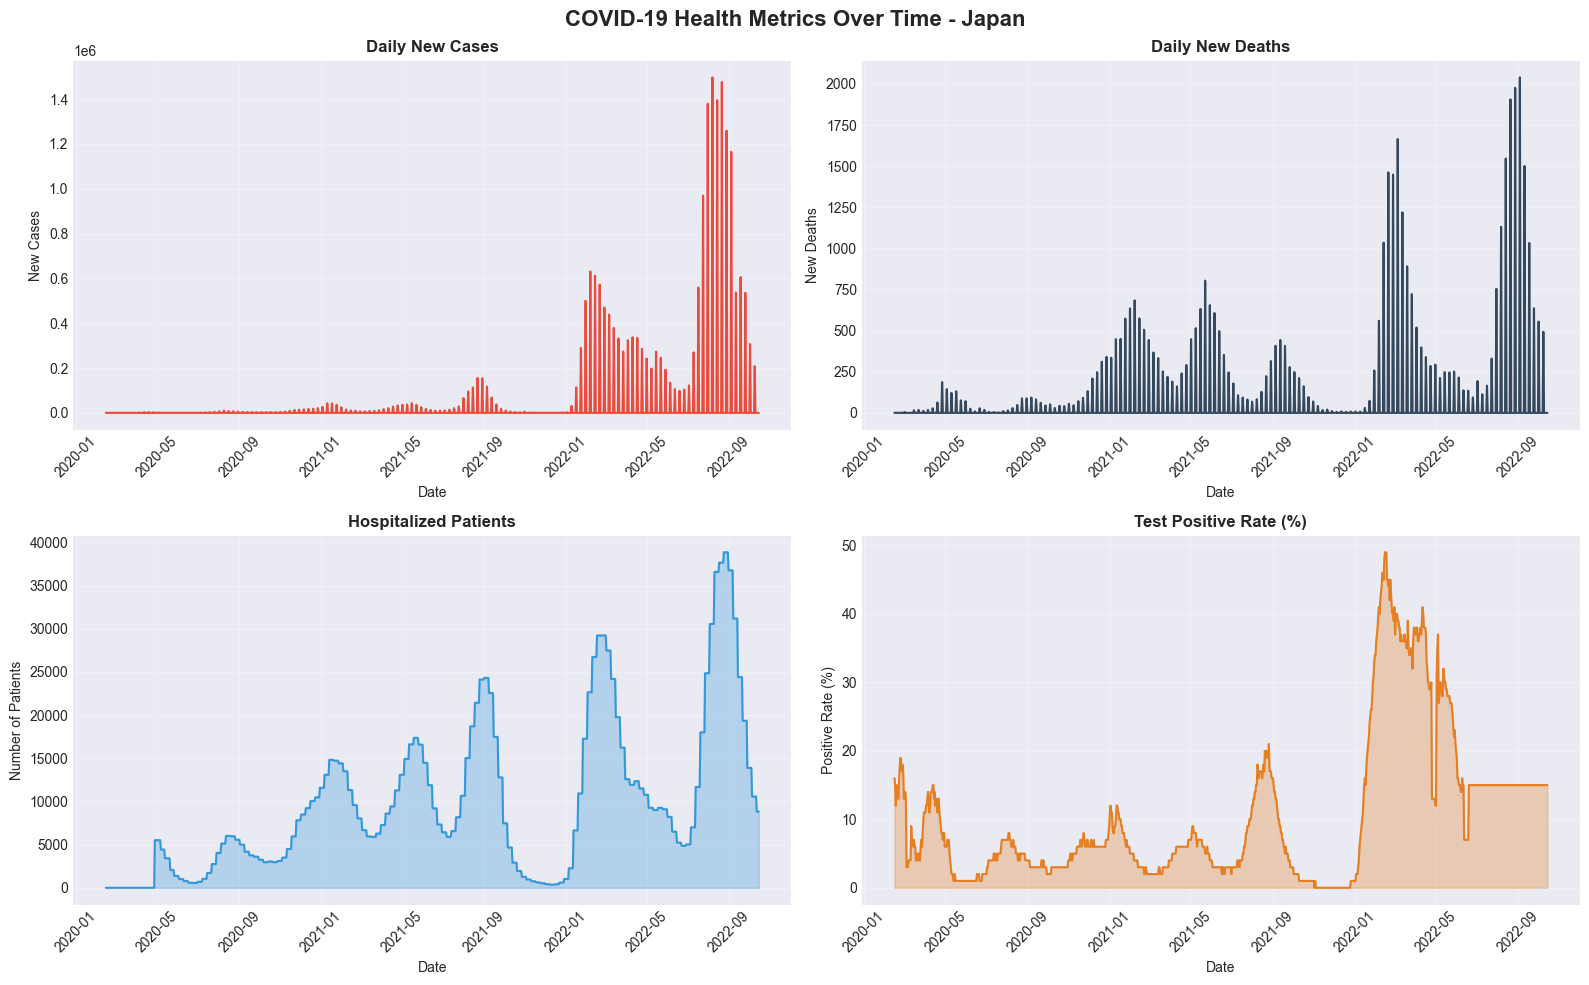

In [16]:
# Figure 1: COVID-19 Cases Over Time
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('COVID-19 Health Metrics Over Time - Japan', fontsize=16, fontweight='bold')

# New Cases
axes[0, 0].plot(df['date'], df['new_cases'], color='#e74c3c', linewidth=1.5)
axes[0, 0].fill_between(df['date'], df['new_cases'], alpha=0.3, color='#e74c3c')
axes[0, 0].set_title('Daily New Cases', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('New Cases')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# New Deaths
axes[0, 1].plot(df['date'], df['new_deaths'], color='#34495e', linewidth=1.5)
axes[0, 1].fill_between(df['date'], df['new_deaths'], alpha=0.3, color='#34495e')
axes[0, 1].set_title('Daily New Deaths', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('New Deaths')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# Hospitalized Patients
axes[1, 0].plot(df['date'], df['hosp_patients'], color='#3498db', linewidth=1.5)
axes[1, 0].fill_between(df['date'], df['hosp_patients'], alpha=0.3, color='#3498db')
axes[1, 0].set_title('Hospitalized Patients', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Number of Patients')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].tick_params(axis='x', rotation=45)

# Positive Rate
axes[1, 1].plot(df['date'], df['positive_rate']*100, color='#e67e22', linewidth=1.5)
axes[1, 1].fill_between(df['date'], df['positive_rate']*100, alpha=0.3, color='#e67e22')
axes[1, 1].set_title('Test Positive Rate (%)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Positive Rate (%)')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

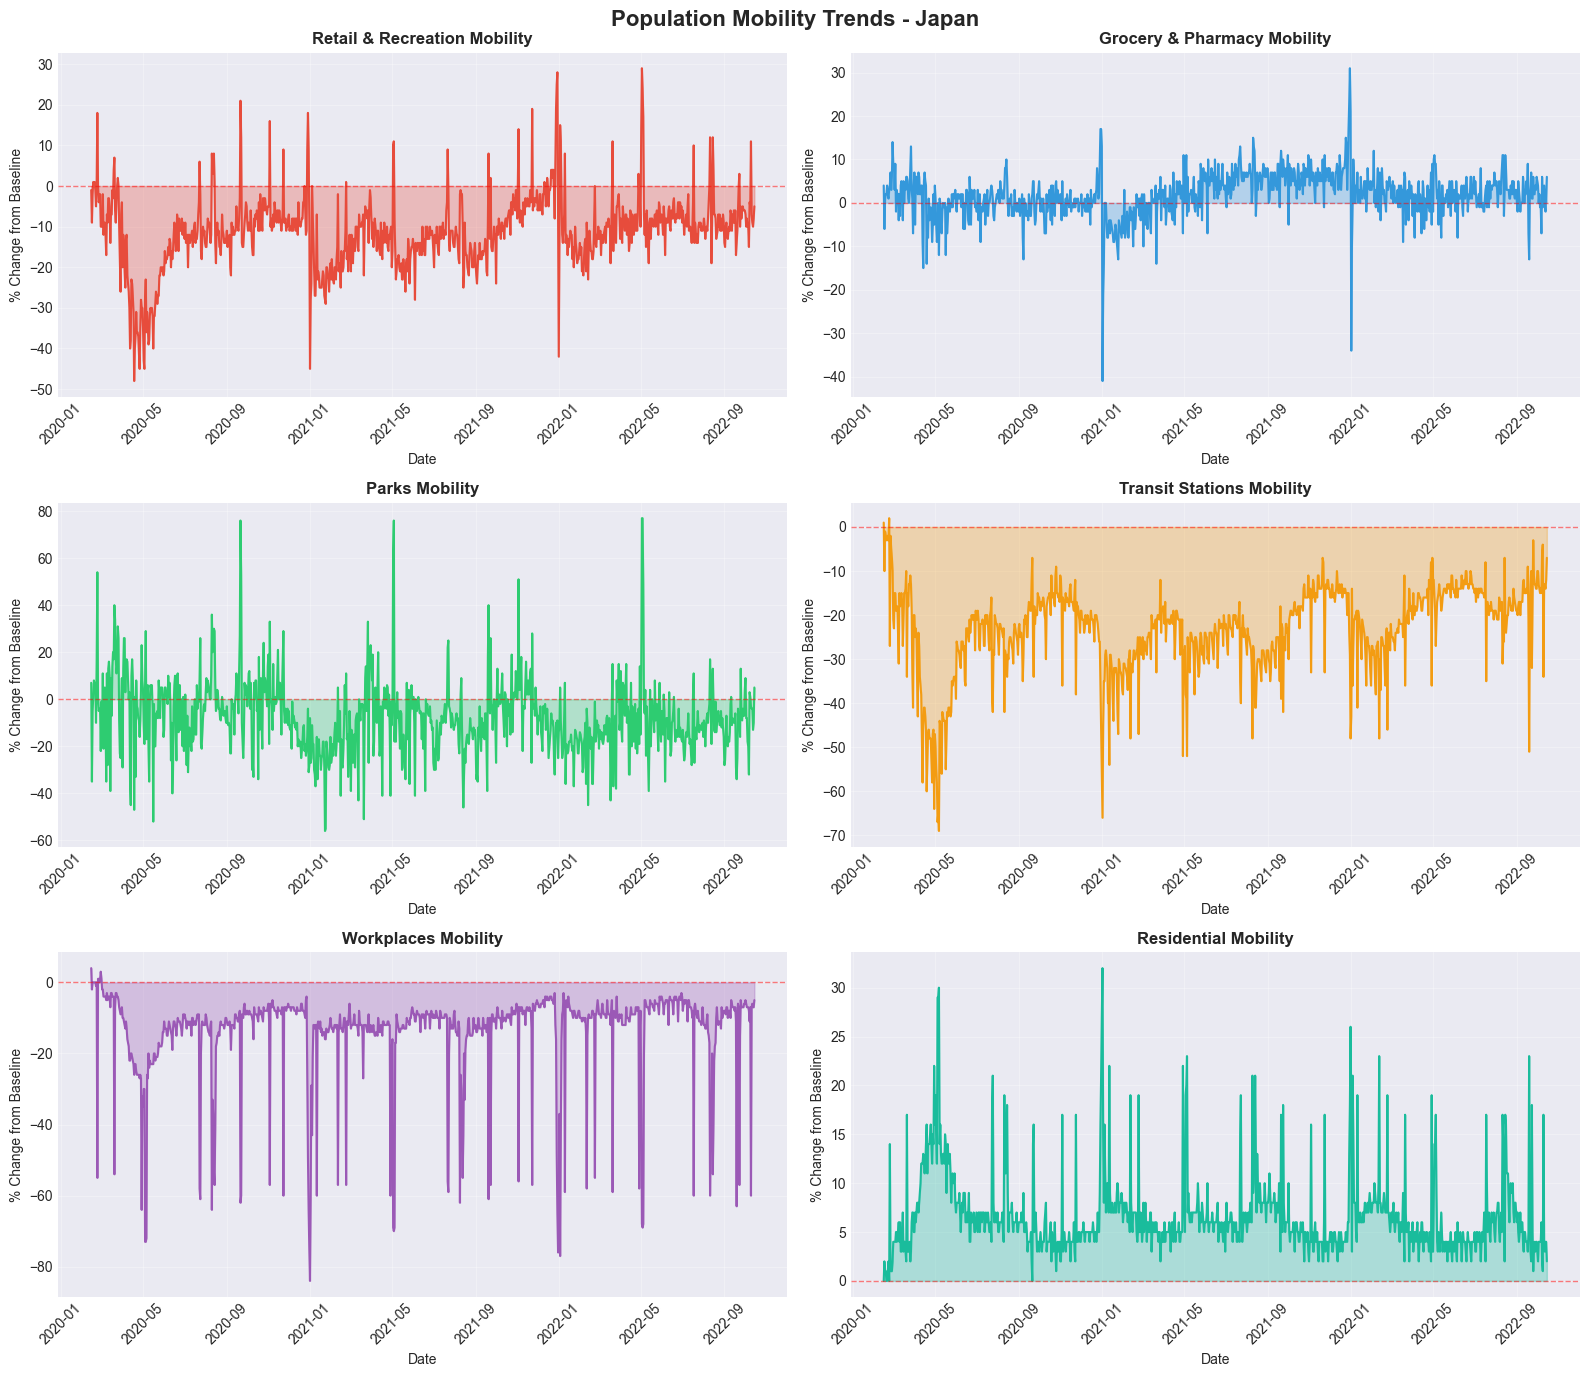

In [17]:
# Figure 2: Mobility Trends Over Time
fig, axes = plt.subplots(3, 2, figsize=(16, 14))
fig.suptitle('Population Mobility Trends - Japan', fontsize=16, fontweight='bold')

mobility_metrics = [
    ('retail_and_recreation_percent_change_from_baseline', 'Retail & Recreation', '#e74c3c'),
    ('grocery_and_pharmacy_percent_change_from_baseline', 'Grocery & Pharmacy', '#3498db'),
    ('parks_percent_change_from_baseline', 'Parks', '#2ecc71'),
    ('transit_stations_percent_change_from_baseline', 'Transit Stations', '#f39c12'),
    ('workplaces_percent_change_from_baseline', 'Workplaces', '#9b59b6'),
    ('residential_percent_change_from_baseline', 'Residential', '#1abc9c')
]

for idx, (col, title, color) in enumerate(mobility_metrics):
    row = idx // 2
    col_idx = idx % 2
    axes[row, col_idx].plot(df['date'], df[col], color=color, linewidth=1.5)
    axes[row, col_idx].fill_between(df['date'], df[col], alpha=0.3, color=color)
    axes[row, col_idx].axhline(y=0, color='red', linestyle='--', alpha=0.5, linewidth=1)
    axes[row, col_idx].set_title(f'{title} Mobility', fontsize=12, fontweight='bold')
    axes[row, col_idx].set_xlabel('Date')
    axes[row, col_idx].set_ylabel('% Change from Baseline')
    axes[row, col_idx].grid(True, alpha=0.3)
    axes[row, col_idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

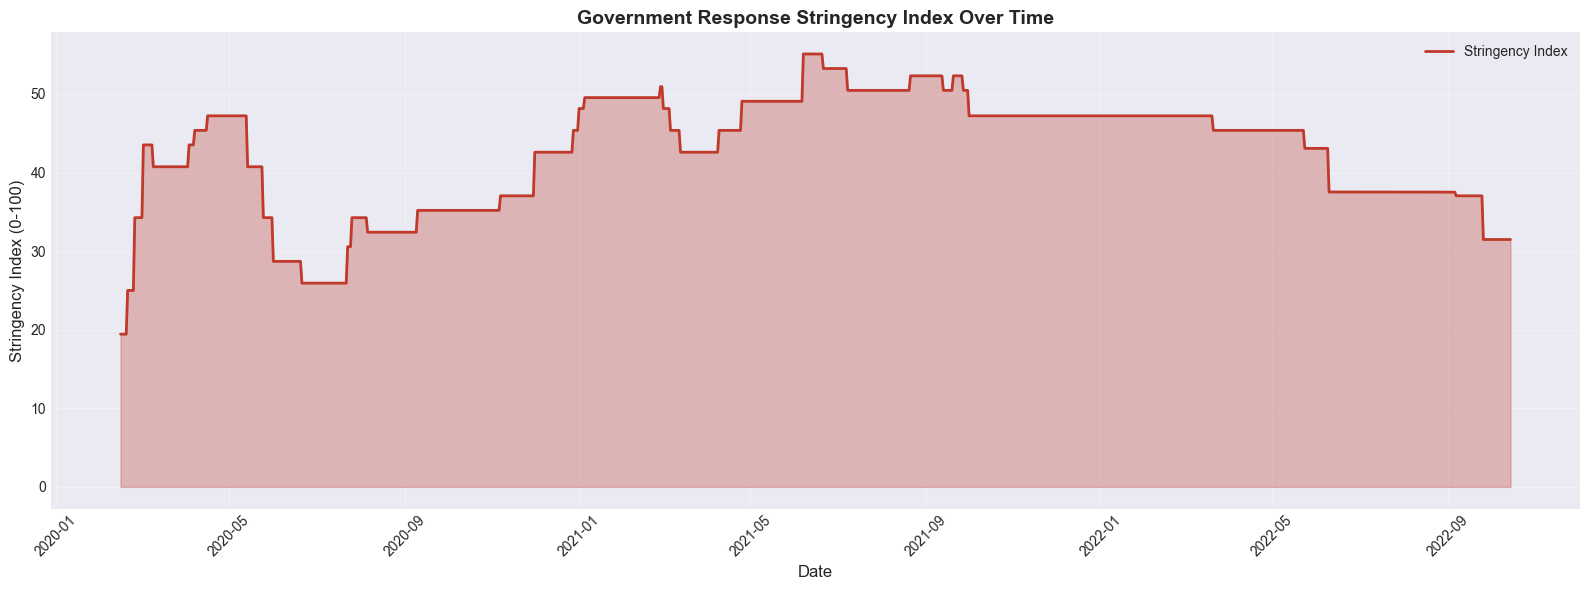

In [18]:
# Figure 3: Government Stringency Index Over Time
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(df['date'], df['stringency_index'], color='#c0392b', linewidth=2, label='Stringency Index')
ax.fill_between(df['date'], df['stringency_index'], alpha=0.3, color='#c0392b')
ax.set_title('Government Response Stringency Index Over Time', fontsize=14, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Stringency Index (0-100)', fontsize=12)
ax.grid(True, alpha=0.3)
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. DISTRIBUTION ANALYSIS

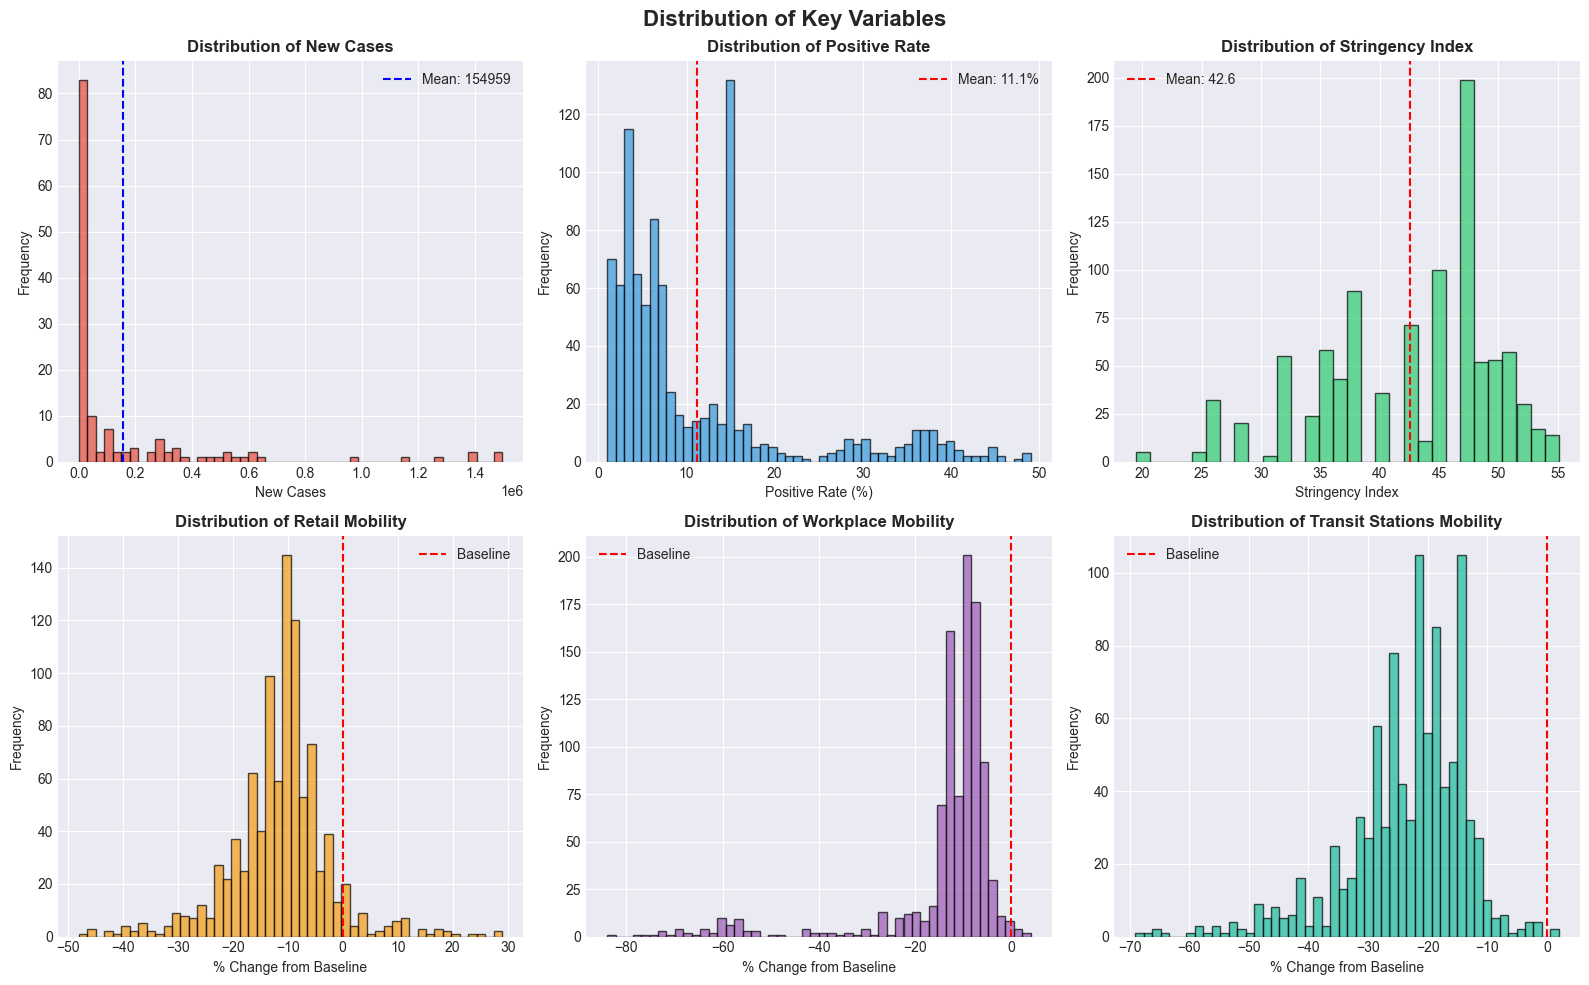

In [19]:
# Figure 4: Distribution of Key Variables
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Distribution of Key Variables', fontsize=16, fontweight='bold')

# New Cases Distribution
df_cases = df[df['new_cases'] > 0]
axes[0, 0].hist(df_cases['new_cases'], bins=50, color='#e74c3c', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Distribution of New Cases', fontweight='bold')
axes[0, 0].set_xlabel('New Cases')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df_cases['new_cases'].mean(), color='blue', linestyle='--', label=f'Mean: {df_cases["new_cases"].mean():.0f}')
axes[0, 0].legend()

# Positive Rate Distribution
df_pos = df[df['positive_rate'] > 0]
axes[0, 1].hist(df_pos['positive_rate']*100, bins=50, color='#3498db', alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Distribution of Positive Rate', fontweight='bold')
axes[0, 1].set_xlabel('Positive Rate (%)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(df_pos['positive_rate'].mean()*100, color='red', linestyle='--', label=f'Mean: {df_pos["positive_rate"].mean()*100:.1f}%')
axes[0, 1].legend()

# Stringency Index Distribution
axes[0, 2].hist(df['stringency_index'], bins=30, color='#2ecc71', alpha=0.7, edgecolor='black')
axes[0, 2].set_title('Distribution of Stringency Index', fontweight='bold')
axes[0, 2].set_xlabel('Stringency Index')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].axvline(df['stringency_index'].mean(), color='red', linestyle='--', label=f'Mean: {df["stringency_index"].mean():.1f}')
axes[0, 2].legend()

# Retail Mobility Distribution
axes[1, 0].hist(df['retail_and_recreation_percent_change_from_baseline'], bins=50, color='#f39c12', alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Distribution of Retail Mobility', fontweight='bold')
axes[1, 0].set_xlabel('% Change from Baseline')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].axvline(0, color='red', linestyle='--', label='Baseline')
axes[1, 0].legend()

# Workplace Mobility Distribution
axes[1, 1].hist(df['workplaces_percent_change_from_baseline'], bins=50, color='#9b59b6', alpha=0.7, edgecolor='black')
axes[1, 1].set_title('Distribution of Workplace Mobility', fontweight='bold')
axes[1, 1].set_xlabel('% Change from Baseline')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].axvline(0, color='red', linestyle='--', label='Baseline')
axes[1, 1].legend()

# Transit Stations Mobility Distribution
axes[1, 2].hist(df['transit_stations_percent_change_from_baseline'], bins=50, color='#1abc9c', alpha=0.7, edgecolor='black')
axes[1, 2].set_title('Distribution of Transit Stations Mobility', fontweight='bold')
axes[1, 2].set_xlabel('% Change from Baseline')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].axvline(0, color='red', linestyle='--', label='Baseline')
axes[1, 2].legend()

plt.tight_layout()
plt.show()

# 6. CORRELATION ANALYSIS

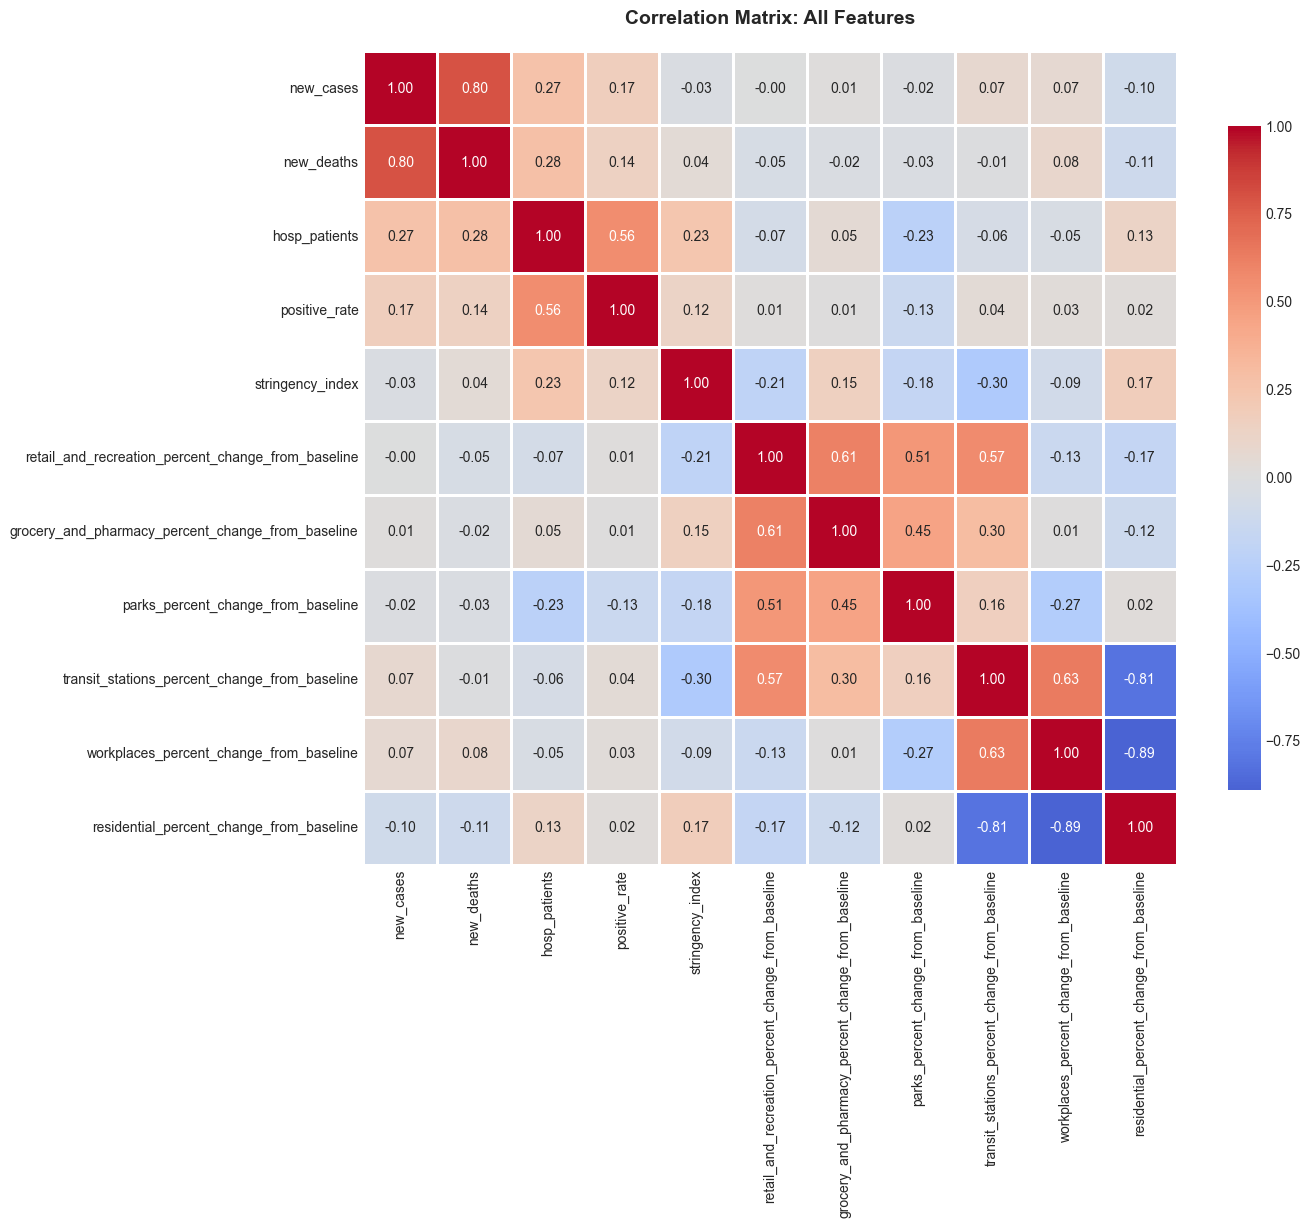

In [20]:
# Figure 5: Correlation Heatmap
fig, ax = plt.subplots(figsize=(14, 12))

# Select numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr_matrix = df[numeric_cols].corr()

# Create heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Correlation Matrix: All Features', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [21]:
# Correlation with new_cases
print("\nCorrelation with New Cases:")
cases_corr = corr_matrix['new_cases'].sort_values(ascending=False)
print(cases_corr[cases_corr.index != 'new_cases'])


Correlation with New Cases:
new_deaths                                            0.799410
hosp_patients                                         0.267837
positive_rate                                         0.168309
transit_stations_percent_change_from_baseline         0.070253
workplaces_percent_change_from_baseline               0.068650
grocery_and_pharmacy_percent_change_from_baseline     0.010154
retail_and_recreation_percent_change_from_baseline   -0.003961
parks_percent_change_from_baseline                   -0.016767
stringency_index                                     -0.032184
residential_percent_change_from_baseline             -0.097980
Name: new_cases, dtype: float64


In [22]:
# Correlation with positive_rate
print("\nCorrelation with Positive Rate:")
pos_corr = corr_matrix['positive_rate'].sort_values(ascending=False)
print(pos_corr[pos_corr.index != 'positive_rate'])


Correlation with Positive Rate:
hosp_patients                                         0.556542
new_cases                                             0.168309
new_deaths                                            0.144156
stringency_index                                      0.123169
transit_stations_percent_change_from_baseline         0.042889
workplaces_percent_change_from_baseline               0.026053
residential_percent_change_from_baseline              0.022706
retail_and_recreation_percent_change_from_baseline    0.011005
grocery_and_pharmacy_percent_change_from_baseline     0.009503
parks_percent_change_from_baseline                   -0.133785
Name: positive_rate, dtype: float64


# 7. LAGGED CORRELATION ANALYSIS

In [23]:
# Calculate lagged correlations
lag_days = [7, 14, 21]
mobility_features = ['retail_and_recreation_percent_change_from_baseline',
                     'workplaces_percent_change_from_baseline',
                     'transit_stations_percent_change_from_baseline']

lag_results = []

for feature in mobility_features:
    for lag in lag_days:
        df_temp = df.copy()
        df_temp[f'{feature}_lag{lag}'] = df_temp[feature].shift(lag)
        corr = df_temp['new_cases'].corr(df_temp[f'{feature}_lag{lag}'])
        lag_results.append({
            'Feature': feature.replace('_percent_change_from_baseline', ''),
            'Lag (days)': lag,
            'Correlation': corr
        })
        print(f"{feature.replace('_percent_change_from_baseline', '')} (Lag {lag} days): {corr:.3f}")

retail_and_recreation (Lag 7 days): -0.004
retail_and_recreation (Lag 14 days): 0.005
retail_and_recreation (Lag 21 days): 0.017
workplaces (Lag 7 days): 0.067
workplaces (Lag 14 days): 0.069
workplaces (Lag 21 days): 0.070
transit_stations (Lag 7 days): 0.067
transit_stations (Lag 14 days): 0.071
transit_stations (Lag 21 days): 0.078


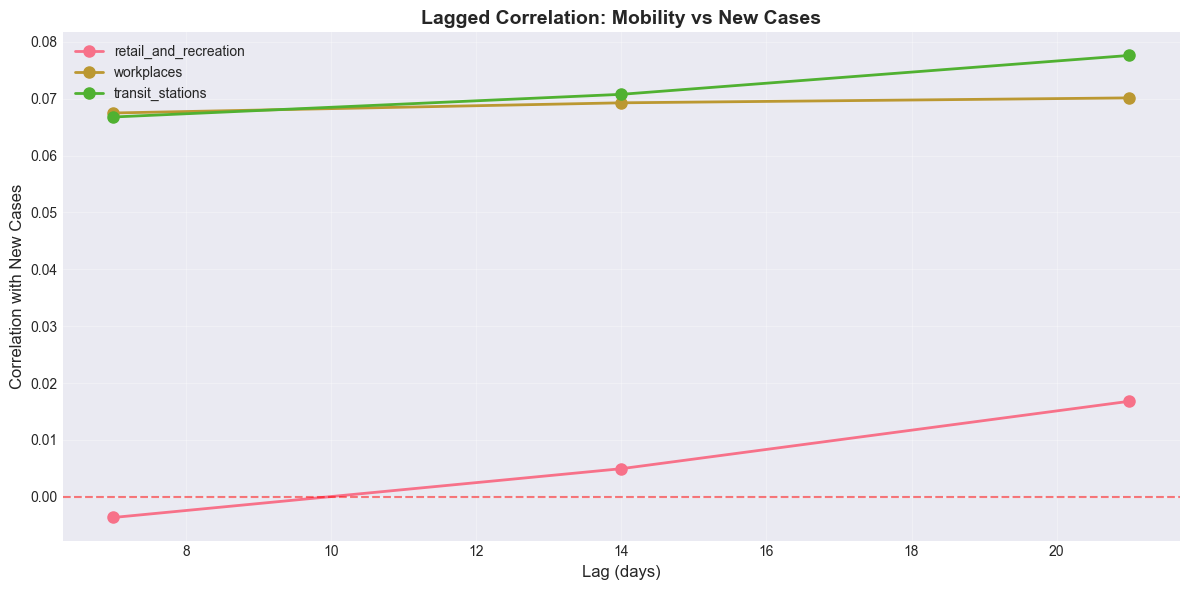

In [24]:
# Visualize lagged correlations
lag_df = pd.DataFrame(lag_results)
fig, ax = plt.subplots(figsize=(12, 6))

for feature in lag_df['Feature'].unique():
    feature_data = lag_df[lag_df['Feature'] == feature]
    ax.plot(feature_data['Lag (days)'], feature_data['Correlation'], 
            marker='o', linewidth=2, label=feature, markersize=8)

ax.set_xlabel('Lag (days)', fontsize=12)
ax.set_ylabel('Correlation with New Cases', fontsize=12)
ax.set_title('Lagged Correlation: Mobility vs New Cases', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='red', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 8. RELATIONSHIP ANALYSIS

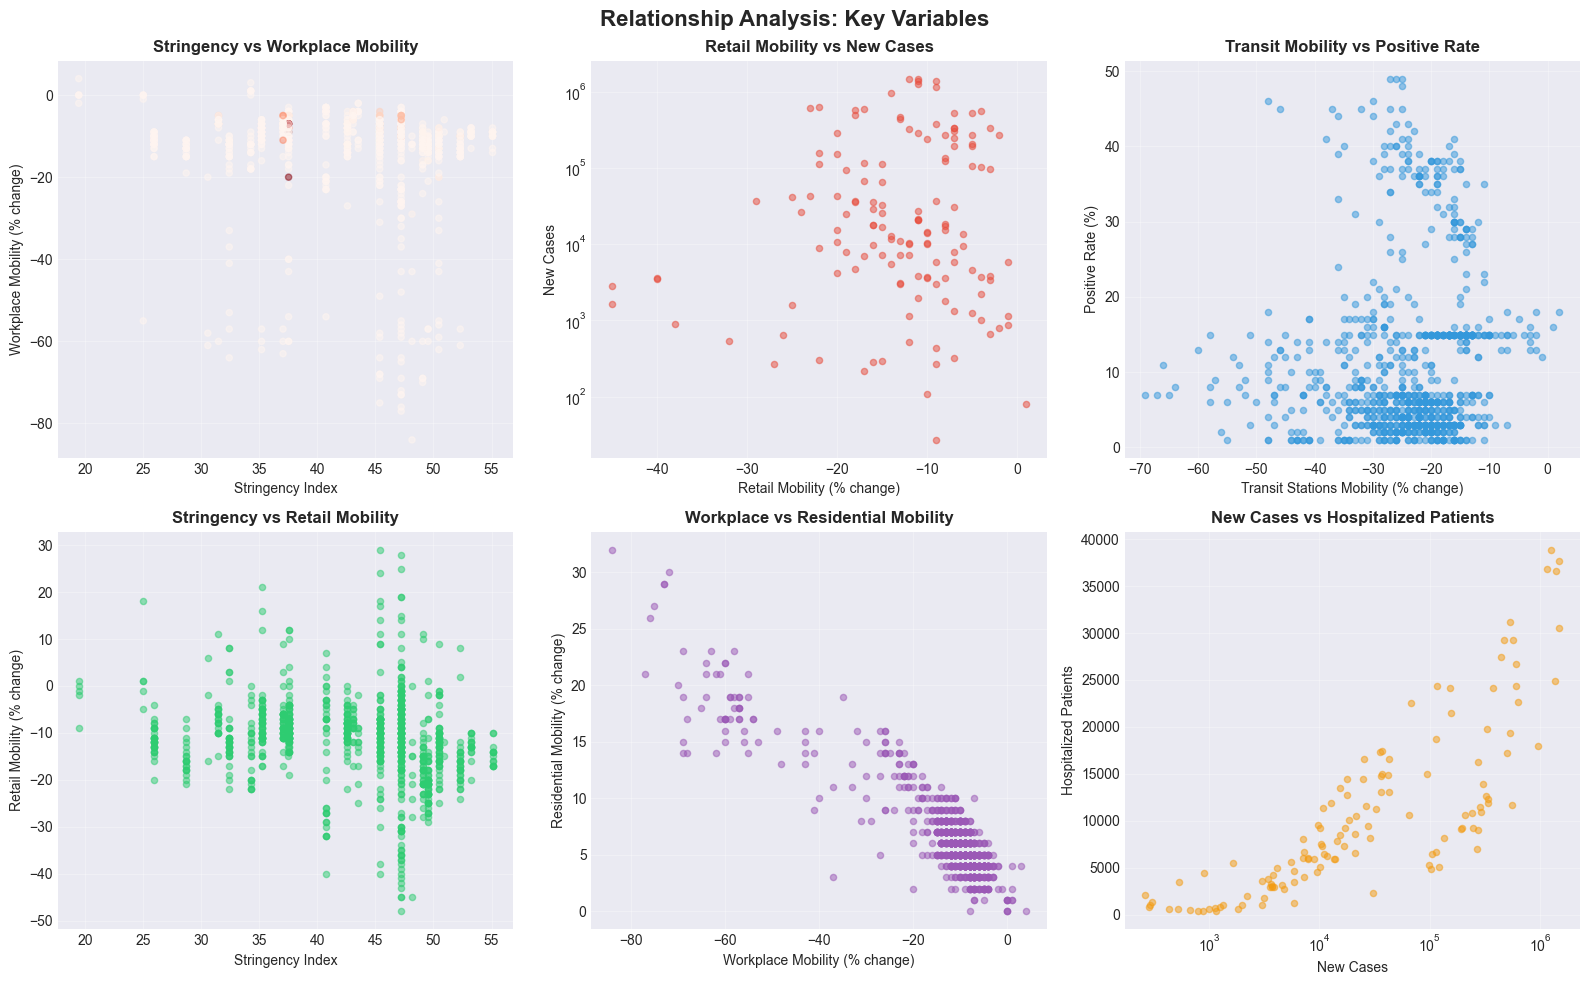

In [25]:
# Figure 6: Scatter Plots - Key Relationships
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Relationship Analysis: Key Variables', fontsize=16, fontweight='bold')

# Stringency vs Workplace Mobility
axes[0, 0].scatter(df['stringency_index'], df['workplaces_percent_change_from_baseline'], 
                   alpha=0.5, c=df['new_cases'], cmap='Reds', s=20)
axes[0, 0].set_xlabel('Stringency Index')
axes[0, 0].set_ylabel('Workplace Mobility (% change)')
axes[0, 0].set_title('Stringency vs Workplace Mobility', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Retail Mobility vs New Cases
df_nonzero = df[df['new_cases'] > 0]
axes[0, 1].scatter(df_nonzero['retail_and_recreation_percent_change_from_baseline'], 
                   df_nonzero['new_cases'], alpha=0.5, color='#e74c3c', s=20)
axes[0, 1].set_xlabel('Retail Mobility (% change)')
axes[0, 1].set_ylabel('New Cases')
axes[0, 1].set_title('Retail Mobility vs New Cases', fontweight='bold')
axes[0, 1].set_yscale('log')
axes[0, 1].grid(True, alpha=0.3)

# Transit Mobility vs Positive Rate
df_pos_nonzero = df[df['positive_rate'] > 0]
axes[0, 2].scatter(df_pos_nonzero['transit_stations_percent_change_from_baseline'], 
                   df_pos_nonzero['positive_rate']*100, alpha=0.5, color='#3498db', s=20)
axes[0, 2].set_xlabel('Transit Stations Mobility (% change)')
axes[0, 2].set_ylabel('Positive Rate (%)')
axes[0, 2].set_title('Transit Mobility vs Positive Rate', fontweight='bold')
axes[0, 2].grid(True, alpha=0.3)

# Stringency vs Retail Mobility
axes[1, 0].scatter(df['stringency_index'], df['retail_and_recreation_percent_change_from_baseline'], 
                   alpha=0.5, color='#2ecc71', s=20)
axes[1, 0].set_xlabel('Stringency Index')
axes[1, 0].set_ylabel('Retail Mobility (% change)')
axes[1, 0].set_title('Stringency vs Retail Mobility', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Workplace vs Residential Mobility
axes[1, 1].scatter(df['workplaces_percent_change_from_baseline'], 
                   df['residential_percent_change_from_baseline'], 
                   alpha=0.5, color='#9b59b6', s=20)
axes[1, 1].set_xlabel('Workplace Mobility (% change)')
axes[1, 1].set_ylabel('Residential Mobility (% change)')
axes[1, 1].set_title('Workplace vs Residential Mobility', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

# Hospitalized Patients vs New Cases
df_hosp = df[df['hosp_patients'] > 0]
axes[1, 2].scatter(df_hosp['new_cases'], df_hosp['hosp_patients'], 
                   alpha=0.5, color='#f39c12', s=20)
axes[1, 2].set_xlabel('New Cases')
axes[1, 2].set_ylabel('Hospitalized Patients')
axes[1, 2].set_title('New Cases vs Hospitalized Patients', fontweight='bold')
axes[1, 2].set_xscale('log')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 9. TEMPORAL PATTERNS

In [26]:
# Add temporal features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek
df['week'] = df['date'].dt.isocalendar().week

# Monthly aggregation
monthly_stats = df.groupby([df['date'].dt.to_period('M')]).agg({
    'new_cases': 'sum',
    'new_deaths': 'sum',
    'positive_rate': 'mean',
    'stringency_index': 'mean',
    'workplaces_percent_change_from_baseline': 'mean',
    'retail_and_recreation_percent_change_from_baseline': 'mean'
}).reset_index()

monthly_stats['date'] = monthly_stats['date'].dt.to_timestamp()

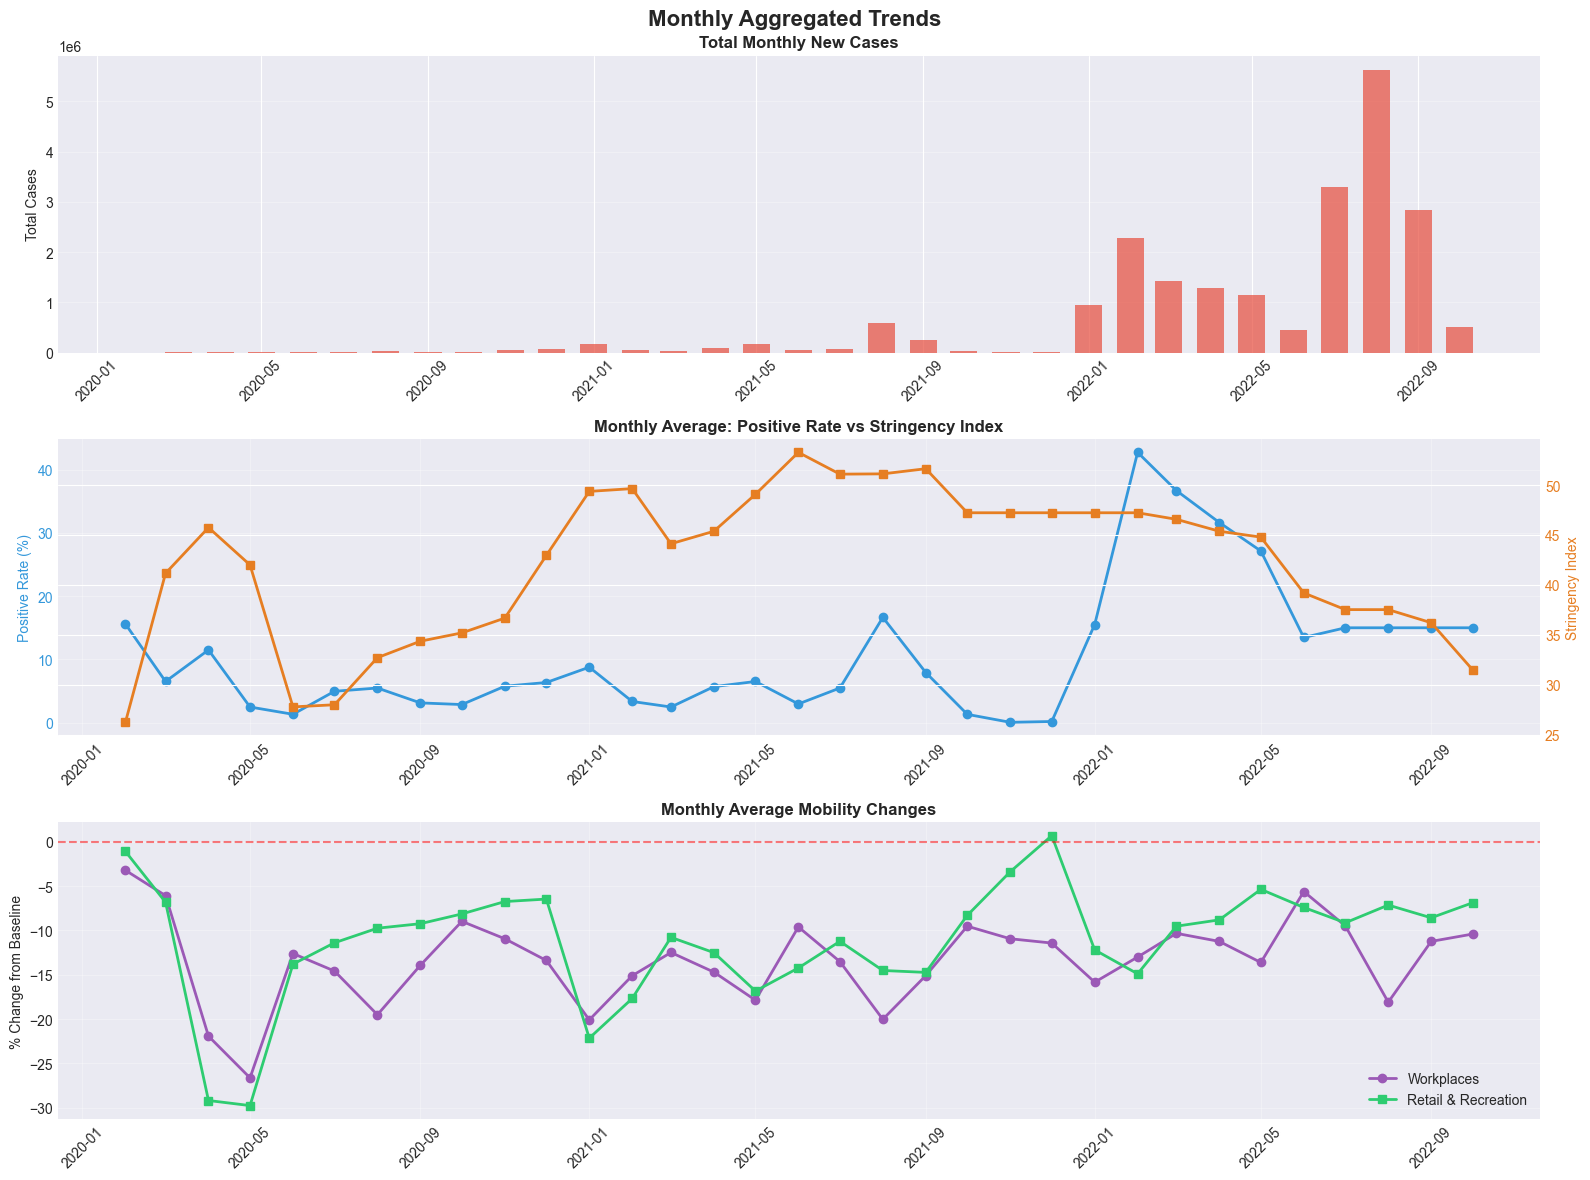

In [27]:
# Figure 7: Monthly Aggregated Trends
fig, axes = plt.subplots(3, 1, figsize=(16, 12))
fig.suptitle('Monthly Aggregated Trends', fontsize=16, fontweight='bold')

# Monthly Cases
axes[0].bar(monthly_stats['date'], monthly_stats['new_cases'], color='#e74c3c', alpha=0.7, width=20)
axes[0].set_title('Total Monthly New Cases', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Total Cases')
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].tick_params(axis='x', rotation=45)

# Monthly Positive Rate vs Stringency
ax2 = axes[1].twinx()
axes[1].plot(monthly_stats['date'], monthly_stats['positive_rate']*100, 
             color='#3498db', marker='o', linewidth=2, label='Positive Rate')
ax2.plot(monthly_stats['date'], monthly_stats['stringency_index'], 
         color='#e67e22', marker='s', linewidth=2, label='Stringency Index')
axes[1].set_title('Monthly Average: Positive Rate vs Stringency Index', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Positive Rate (%)', color='#3498db')
ax2.set_ylabel('Stringency Index', color='#e67e22')
axes[1].tick_params(axis='y', labelcolor='#3498db')
ax2.tick_params(axis='y', labelcolor='#e67e22')
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

# Monthly Mobility
axes[2].plot(monthly_stats['date'], monthly_stats['workplaces_percent_change_from_baseline'], 
             marker='o', linewidth=2, label='Workplaces', color='#9b59b6')
axes[2].plot(monthly_stats['date'], monthly_stats['retail_and_recreation_percent_change_from_baseline'], 
             marker='s', linewidth=2, label='Retail & Recreation', color='#2ecc71')
axes[2].set_title('Monthly Average Mobility Changes', fontsize=12, fontweight='bold')
axes[2].set_ylabel('% Change from Baseline')
axes[2].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[2].legend()
axes[2].grid(True, alpha=0.3)
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 10. BOX PLOTS FOR OUTLIER DETECTION

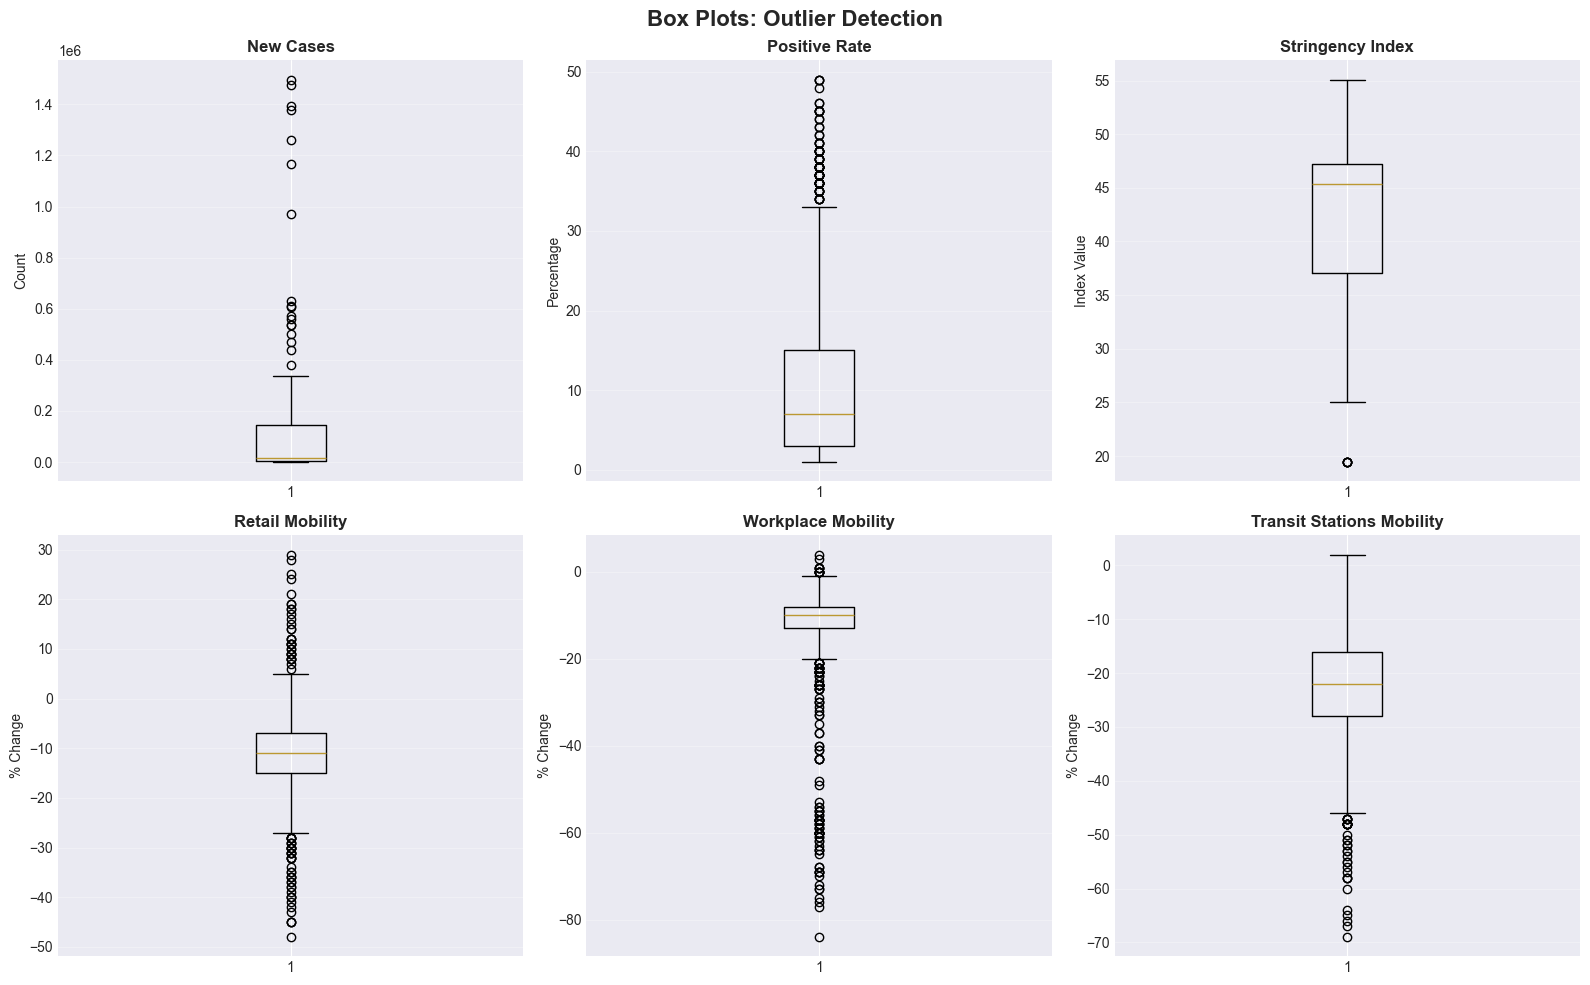

In [28]:
# Figure 8: Box Plots
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Box Plots: Outlier Detection', fontsize=16, fontweight='bold')

# New Cases
df_cases_nonzero = df[df['new_cases'] > 0]
axes[0, 0].boxplot(df_cases_nonzero['new_cases'], vert=True)
axes[0, 0].set_title('New Cases', fontweight='bold')
axes[0, 0].set_ylabel('Count')
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Positive Rate
df_pos_rate = df[df['positive_rate'] > 0]
axes[0, 1].boxplot(df_pos_rate['positive_rate']*100, vert=True)
axes[0, 1].set_title('Positive Rate', fontweight='bold')
axes[0, 1].set_ylabel('Percentage')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Stringency Index
axes[0, 2].boxplot(df['stringency_index'], vert=True)
axes[0, 2].set_title('Stringency Index', fontweight='bold')
axes[0, 2].set_ylabel('Index Value')
axes[0, 2].grid(True, alpha=0.3, axis='y')

# Retail Mobility
axes[1, 0].boxplot(df['retail_and_recreation_percent_change_from_baseline'], vert=True)
axes[1, 0].set_title('Retail Mobility', fontweight='bold')
axes[1, 0].set_ylabel('% Change')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Workplace Mobility
axes[1, 1].boxplot(df['workplaces_percent_change_from_baseline'], vert=True)
axes[1, 1].set_title('Workplace Mobility', fontweight='bold')
axes[1, 1].set_ylabel('% Change')
axes[1, 1].grid(True, alpha=0.3, axis='y')

# Transit Mobility
axes[1, 2].boxplot(df['transit_stations_percent_change_from_baseline'], vert=True)
axes[1, 2].set_title('Transit Stations Mobility', fontweight='bold')
axes[1, 2].set_ylabel('% Change')
axes[1, 2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# 11. ROLLING AVERAGES

In [29]:
# Calculate 7-day and 14-day rolling averages
df['new_cases_7day_avg'] = df['new_cases'].rolling(window=7, min_periods=1).mean()
df['new_cases_14day_avg'] = df['new_cases'].rolling(window=14, min_periods=1).mean()
df['positive_rate_7day_avg'] = df['positive_rate'].rolling(window=7, min_periods=1).mean()
df['workplaces_7day_avg'] = df['workplaces_percent_change_from_baseline'].rolling(window=7, min_periods=1).mean()

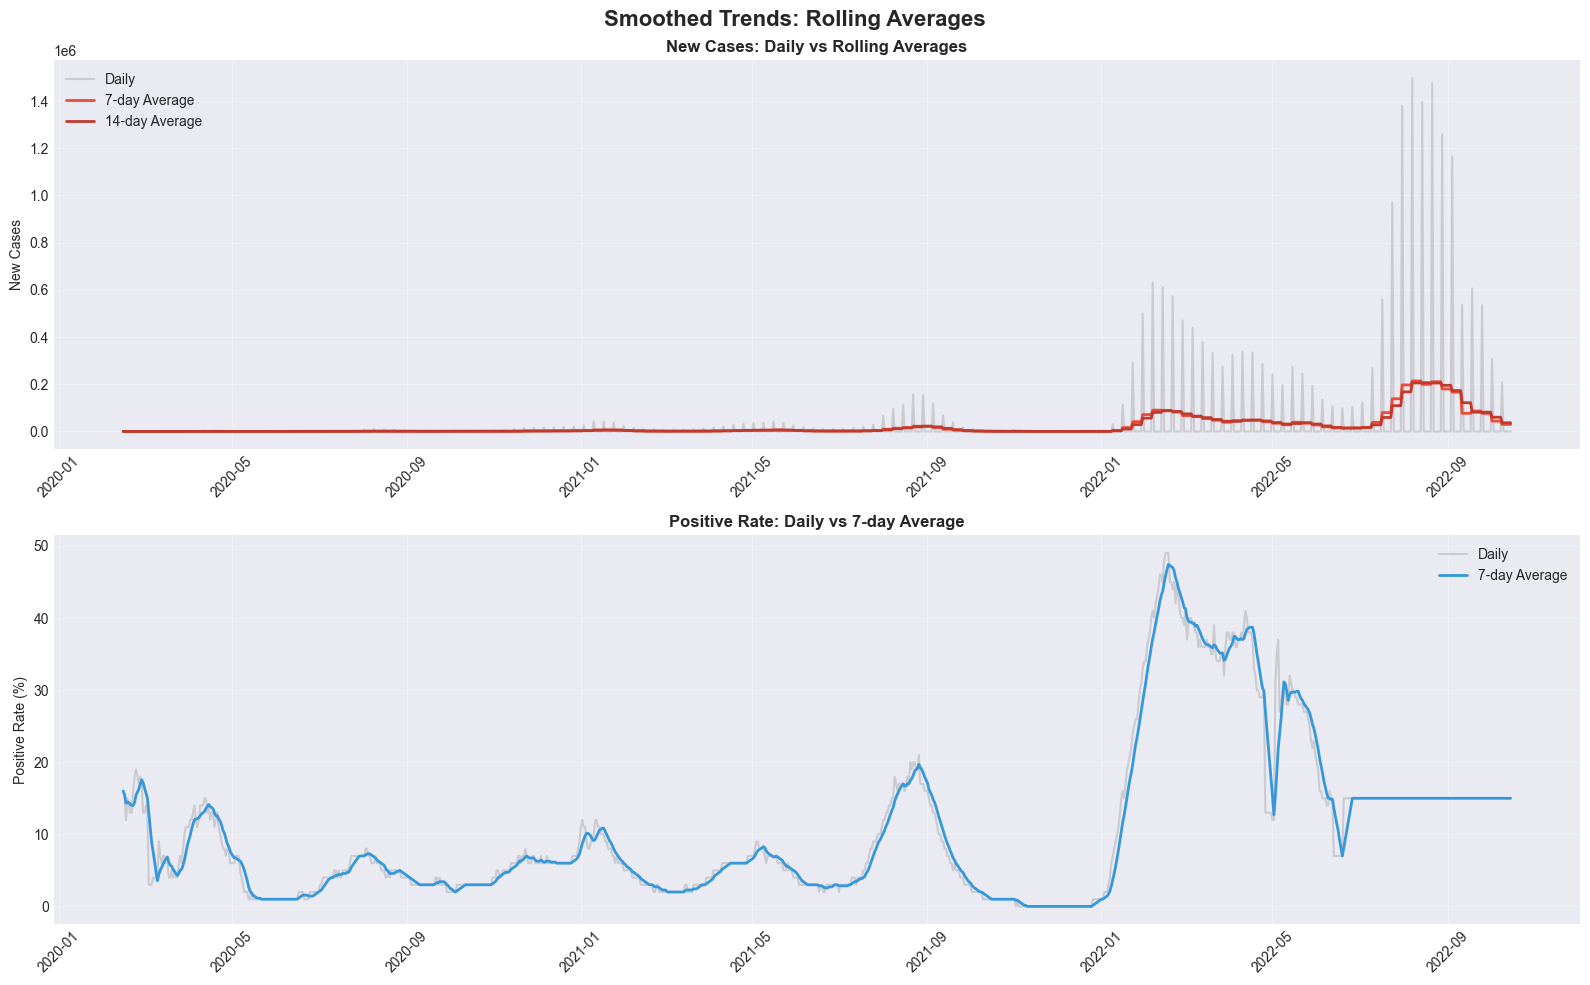

In [30]:
# Figure 9: Rolling Averages
fig, axes = plt.subplots(2, 1, figsize=(16, 10))
fig.suptitle('Smoothed Trends: Rolling Averages', fontsize=16, fontweight='bold')

# New Cases with Rolling Averages
axes[0].plot(df['date'], df['new_cases'], alpha=0.3, color='gray', label='Daily')
axes[0].plot(df['date'], df['new_cases_7day_avg'], linewidth=2, color='#e74c3c', label='7-day Average')
axes[0].plot(df['date'], df['new_cases_14day_avg'], linewidth=2, color='#c0392b', label='14-day Average')
axes[0].set_title('New Cases: Daily vs Rolling Averages', fontsize=12, fontweight='bold')
axes[0].set_ylabel('New Cases')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Positive Rate with Rolling Average
axes[1].plot(df['date'], df['positive_rate']*100, alpha=0.3, color='gray', label='Daily')
axes[1].plot(df['date'], df['positive_rate_7day_avg']*100, linewidth=2, color='#3498db', label='7-day Average')
axes[1].set_title('Positive Rate: Daily vs 7-day Average', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Positive Rate (%)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 12. SUMMARY STATISTICS BY YEAR

In [31]:
yearly_summary = df.groupby('year').agg({
    'new_cases': ['sum', 'mean', 'max'],
    'new_deaths': ['sum', 'mean'],
    'positive_rate': ['mean', 'max'],
    'stringency_index': ['mean', 'min', 'max'],
    'workplaces_percent_change_from_baseline': 'mean',
    'retail_and_recreation_percent_change_from_baseline': 'mean'
})

print(yearly_summary)

       new_cases                          new_deaths            positive_rate  \
             sum          mean        max        sum       mean          mean   
year                                                                            
2020    217287.0    676.906542    21432.0     3213.0  10.009346      0.055296   
2021   1514477.0   4149.252055   155807.0    15174.0  41.572603      0.051452   
2022  19807530.0  68776.145833  1496968.0    27124.0  94.180556      0.229618   

           stringency_index                \
       max             mean    min    max   
year                                        
2020  0.19        36.172804  19.44  47.22   
2021  0.21        48.847836  42.59  55.09   
2022  0.49        41.802083  31.48  47.22   

     workplaces_percent_change_from_baseline  \
                                        mean   
year                                           
2020                              -14.311526   
2021                              -14.208219   
20

# 13. KEY INSIGHTS SUMMARY

In [32]:
# Peak values
peak_cases_date = df.loc[df['new_cases'].idxmax(), 'date']
peak_cases_value = df['new_cases'].max()
peak_deaths_date = df.loc[df['new_deaths'].idxmax(), 'date']
peak_deaths_value = df['new_deaths'].max()
peak_positive_rate_date = df.loc[df['positive_rate'].idxmax(), 'date']
peak_positive_rate_value = df['positive_rate'].max()

print(f"\n1. Peak Cases: {peak_cases_value:.0f} on {peak_cases_date.strftime('%Y-%m-%d')}")
print(f"2. Peak Deaths: {peak_deaths_value:.0f} on {peak_deaths_date.strftime('%Y-%m-%d')}")
print(f"3. Peak Positive Rate: {peak_positive_rate_value*100:.2f}% on {peak_positive_rate_date.strftime('%Y-%m-%d')}")

# Mobility insights
avg_workplace_mobility = df['workplaces_percent_change_from_baseline'].mean()
avg_retail_mobility = df['retail_and_recreation_percent_change_from_baseline'].mean()
avg_transit_mobility = df['transit_stations_percent_change_from_baseline'].mean()

print(f"\n4. Average Workplace Mobility Change: {avg_workplace_mobility:.2f}%")
print(f"5. Average Retail Mobility Change: {avg_retail_mobility:.2f}%")
print(f"6. Average Transit Mobility Change: {avg_transit_mobility:.2f}%")

# Stringency insights
max_stringency = df['stringency_index'].max()
avg_stringency = df['stringency_index'].mean()
print(f"\n7. Maximum Stringency Index: {max_stringency:.2f}")
print(f"8. Average Stringency Index: {avg_stringency:.2f}")

# Pandemic waves identification
print("\n9. COVID-19 Waves Identified (Major Peaks):")
df_sorted = df[df['new_cases'] > df['new_cases'].quantile(0.95)].sort_values('date')
wave_dates = df_sorted.groupby(df_sorted['date'].dt.to_period('M'))['new_cases'].max()
print(wave_dates)


1. Peak Cases: 1496968 on 2022-08-07
2. Peak Deaths: 2040 on 2022-09-04
3. Peak Positive Rate: 49.00% on 2022-02-15

4. Average Workplace Mobility Change: -13.58%
5. Average Retail Mobility Change: -11.34%
6. Average Transit Mobility Change: -23.42%

7. Maximum Stringency Index: 55.09
8. Average Stringency Index: 42.59

9. COVID-19 Waves Identified (Major Peaks):
date
2021-01      42905.0
2021-05      43131.0
2021-08     155807.0
2021-09     117008.0
2022-01     499985.0
2022-02     630951.0
2022-03     438913.0
2022-04     337477.0
2022-05     273523.0
2022-06     134170.0
2022-07    1379099.0
2022-08    1496968.0
2022-09    1164787.0
2022-10     306958.0
Freq: M, Name: new_cases, dtype: float64


# 14. FEATURE IMPORTANCE VISUALIZATION

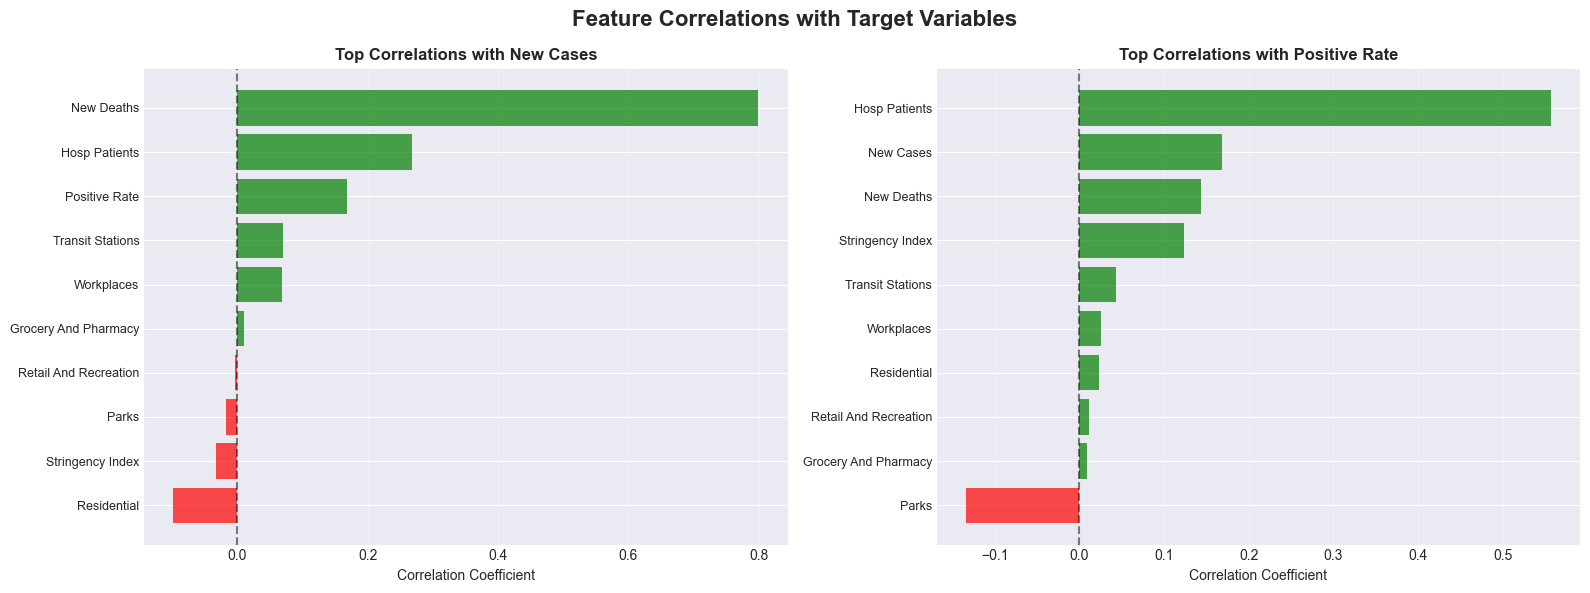

In [33]:
# Figure 10: Top Correlations with Target Variables
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Feature Correlations with Target Variables', fontsize=16, fontweight='bold')

# Correlation with New Cases
cases_corr_sorted = corr_matrix['new_cases'].drop('new_cases').sort_values()
top_cases_corr = pd.concat([cases_corr_sorted.head(5), cases_corr_sorted.tail(5)])
colors = ['red' if x < 0 else 'green' for x in top_cases_corr.values]
axes[0].barh(range(len(top_cases_corr)), top_cases_corr.values, color=colors, alpha=0.7)
axes[0].set_yticks(range(len(top_cases_corr)))
axes[0].set_yticklabels([col.replace('_percent_change_from_baseline', '').replace('_', ' ').title() 
                          for col in top_cases_corr.index], fontsize=9)
axes[0].set_xlabel('Correlation Coefficient')
axes[0].set_title('Top Correlations with New Cases', fontweight='bold')
axes[0].axvline(x=0, color='black', linestyle='--', alpha=0.5)
axes[0].grid(True, alpha=0.3, axis='x')

# Correlation with Positive Rate
pos_corr_sorted = corr_matrix['positive_rate'].drop('positive_rate').sort_values()
top_pos_corr = pd.concat([pos_corr_sorted.head(5), pos_corr_sorted.tail(5)])
colors = ['red' if x < 0 else 'green' for x in top_pos_corr.values]
axes[1].barh(range(len(top_pos_corr)), top_pos_corr.values, color=colors, alpha=0.7)
axes[1].set_yticks(range(len(top_pos_corr)))
axes[1].set_yticklabels([col.replace('_percent_change_from_baseline', '').replace('_', ' ').title() 
                          for col in top_pos_corr.index], fontsize=9)
axes[1].set_xlabel('Correlation Coefficient')
axes[1].set_title('Top Correlations with Positive Rate', fontweight='bold')
axes[1].axvline(x=0, color='black', linestyle='--', alpha=0.5)
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# 15. TIME-LAGGED RELATIONSHIPS (ADVANCED)

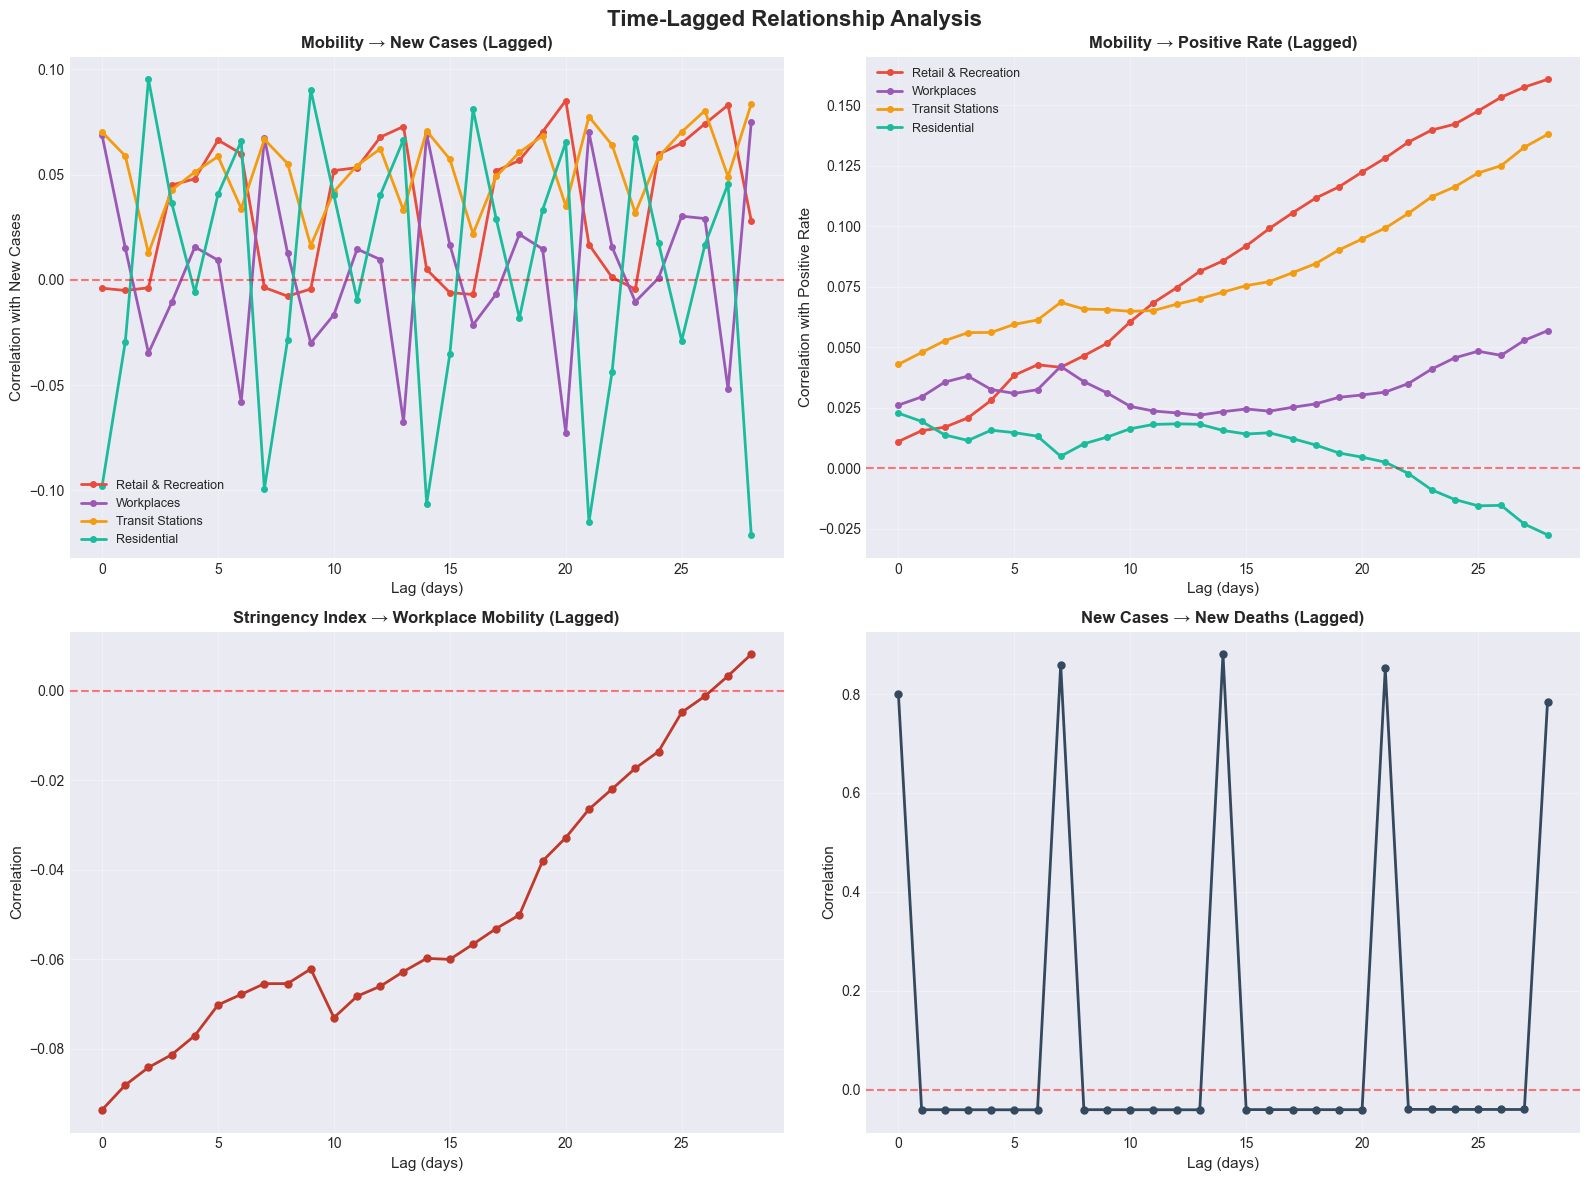

In [34]:
# Figure 11: Comprehensive Lag Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Time-Lagged Relationship Analysis', fontsize=16, fontweight='bold')

# Calculate correlations for different lags
lags = range(0, 29)  # 0 to 28 days
mobility_features_detailed = [
    'retail_and_recreation_percent_change_from_baseline',
    'workplaces_percent_change_from_baseline',
    'transit_stations_percent_change_from_baseline',
    'residential_percent_change_from_baseline'
]

feature_labels = {
    'retail_and_recreation_percent_change_from_baseline': 'Retail & Recreation',
    'workplaces_percent_change_from_baseline': 'Workplaces',
    'transit_stations_percent_change_from_baseline': 'Transit Stations',
    'residential_percent_change_from_baseline': 'Residential'
}

colors_map = {
    'retail_and_recreation_percent_change_from_baseline': '#e74c3c',
    'workplaces_percent_change_from_baseline': '#9b59b6',
    'transit_stations_percent_change_from_baseline': '#f39c12',
    'residential_percent_change_from_baseline': '#1abc9c'
}

# Lag analysis for new_cases
for feature in mobility_features_detailed:
    lag_corrs = []
    for lag in lags:
        df_temp = df.copy()
        df_temp['lagged'] = df_temp[feature].shift(lag)
        corr = df_temp['new_cases'].corr(df_temp['lagged'])
        lag_corrs.append(corr)
    
    axes[0, 0].plot(lags, lag_corrs, marker='o', linewidth=2, 
                    label=feature_labels[feature], color=colors_map[feature], markersize=4)

axes[0, 0].set_xlabel('Lag (days)', fontsize=11)
axes[0, 0].set_ylabel('Correlation with New Cases', fontsize=11)
axes[0, 0].set_title('Mobility → New Cases (Lagged)', fontweight='bold')
axes[0, 0].legend(fontsize=9)
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].axhline(y=0, color='red', linestyle='--', alpha=0.5)

# Lag analysis for positive_rate
for feature in mobility_features_detailed:
    lag_corrs = []
    for lag in lags:
        df_temp = df.copy()
        df_temp['lagged'] = df_temp[feature].shift(lag)
        corr = df_temp['positive_rate'].corr(df_temp['lagged'])
        lag_corrs.append(corr)
    
    axes[0, 1].plot(lags, lag_corrs, marker='o', linewidth=2, 
                    label=feature_labels[feature], color=colors_map[feature], markersize=4)

axes[0, 1].set_xlabel('Lag (days)', fontsize=11)
axes[0, 1].set_ylabel('Correlation with Positive Rate', fontsize=11)
axes[0, 1].set_title('Mobility → Positive Rate (Lagged)', fontweight='bold')
axes[0, 1].legend(fontsize=9)
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].axhline(y=0, color='red', linestyle='--', alpha=0.5)

# Stringency vs Mobility (lagged)
lag_corrs_stringency = []
for lag in lags:
    df_temp = df.copy()
    df_temp['stringency_lagged'] = df_temp['stringency_index'].shift(lag)
    corr = df_temp['workplaces_percent_change_from_baseline'].corr(df_temp['stringency_lagged'])
    lag_corrs_stringency.append(corr)

axes[1, 0].plot(lags, lag_corrs_stringency, marker='o', linewidth=2, color='#c0392b', markersize=5)
axes[1, 0].set_xlabel('Lag (days)', fontsize=11)
axes[1, 0].set_ylabel('Correlation', fontsize=11)
axes[1, 0].set_title('Stringency Index → Workplace Mobility (Lagged)', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].axhline(y=0, color='red', linestyle='--', alpha=0.5)

# Deaths vs Cases (lagged)
lag_corrs_deaths = []
for lag in lags:
    df_temp = df.copy()
    df_temp['cases_lagged'] = df_temp['new_cases'].shift(lag)
    corr = df_temp['new_deaths'].corr(df_temp['cases_lagged'])
    lag_corrs_deaths.append(corr)

axes[1, 1].plot(lags, lag_corrs_deaths, marker='o', linewidth=2, color='#34495e', markersize=5)
axes[1, 1].set_xlabel('Lag (days)', fontsize=11)
axes[1, 1].set_ylabel('Correlation', fontsize=11)
axes[1, 1].set_title('New Cases → New Deaths (Lagged)', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].axhline(y=0, color='red', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [35]:
# Print optimal lag findings
print("\n" + "="*80)
print("OPTIMAL LAG ANALYSIS")
print("="*80)

for feature in mobility_features_detailed:
    lag_corrs = []
    for lag in range(0, 29):
        df_temp = df.copy()
        df_temp['lagged'] = df_temp[feature].shift(lag)
        corr = df_temp['new_cases'].corr(df_temp['lagged'])
        lag_corrs.append((lag, corr))
    
    optimal_lag = max(lag_corrs, key=lambda x: abs(x[1]))
    print(f"\n{feature_labels[feature]}:")
    print(f"  Optimal lag: {optimal_lag[0]} days")
    print(f"  Correlation: {optimal_lag[1]:.3f}")


OPTIMAL LAG ANALYSIS

Retail & Recreation:
  Optimal lag: 20 days
  Correlation: 0.085

Workplaces:
  Optimal lag: 28 days
  Correlation: 0.075

Transit Stations:
  Optimal lag: 28 days
  Correlation: 0.084

Residential:
  Optimal lag: 28 days
  Correlation: -0.121


# 16. PHASE ANALYSIS

In [36]:
# Define phases based on stringency index
df['phase'] = pd.cut(df['stringency_index'], 
                     bins=[0, 35, 45, 60], 
                     labels=['Low Restriction', 'Medium Restriction', 'High Restriction'])

print("\n" + "="*80)
print("ANALYSIS BY RESTRICTION PHASE")
print("="*80)

phase_summary = df.groupby('phase').agg({
    'new_cases': ['mean', 'sum'],
    'positive_rate': 'mean',
    'workplaces_percent_change_from_baseline': 'mean',
    'retail_and_recreation_percent_change_from_baseline': 'mean',
    'transit_stations_percent_change_from_baseline': 'mean'
})

print("\n", phase_summary)


ANALYSIS BY RESTRICTION PHASE

                        new_cases             positive_rate  \
                            mean         sum          mean   
phase                                                        
Low Restriction      3962.416667    570588.0      0.065833   
Medium Restriction  40909.714286  12600192.0      0.089610   
High Restriction    16031.636015   8368514.0      0.125632   

                   workplaces_percent_change_from_baseline  \
                                                      mean   
phase                                                        
Low Restriction                                 -13.215278   
Medium Restriction                              -10.805195   
High Restriction                                -15.323755   

                   retail_and_recreation_percent_change_from_baseline  \
                                                                 mean   
phase                                                                   
Lo

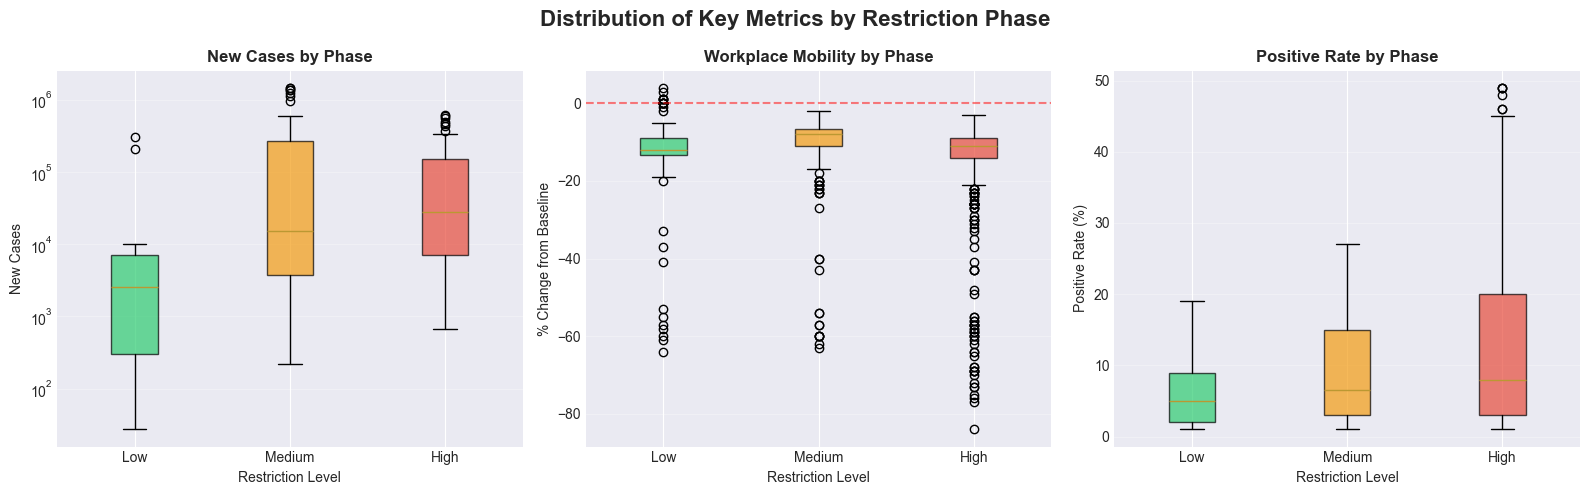

In [37]:
# Figure 12: Box Plots by Phase
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle('Distribution of Key Metrics by Restriction Phase', fontsize=16, fontweight='bold')

# New Cases by Phase
df_cases_phase = df[df['new_cases'] > 0]
phase_data_cases = [df_cases_phase[df_cases_phase['phase'] == phase]['new_cases'].values 
                    for phase in ['Low Restriction', 'Medium Restriction', 'High Restriction']]
bp1 = axes[0].boxplot(phase_data_cases, labels=['Low', 'Medium', 'High'], patch_artist=True)
for patch, color in zip(bp1['boxes'], ['#2ecc71', '#f39c12', '#e74c3c']):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[0].set_xlabel('Restriction Level')
axes[0].set_ylabel('New Cases')
axes[0].set_title('New Cases by Phase', fontweight='bold')
axes[0].set_yscale('log')
axes[0].grid(True, alpha=0.3, axis='y')

# Workplace Mobility by Phase
phase_data_work = [df[df['phase'] == phase]['workplaces_percent_change_from_baseline'].values 
                   for phase in ['Low Restriction', 'Medium Restriction', 'High Restriction']]
bp2 = axes[1].boxplot(phase_data_work, labels=['Low', 'Medium', 'High'], patch_artist=True)
for patch, color in zip(bp2['boxes'], ['#2ecc71', '#f39c12', '#e74c3c']):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[1].set_xlabel('Restriction Level')
axes[1].set_ylabel('% Change from Baseline')
axes[1].set_title('Workplace Mobility by Phase', fontweight='bold')
axes[1].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[1].grid(True, alpha=0.3, axis='y')

# Positive Rate by Phase
df_pos_phase = df[df['positive_rate'] > 0]
phase_data_pos = [df_pos_phase[df_pos_phase['phase'] == phase]['positive_rate'].values * 100
                  for phase in ['Low Restriction', 'Medium Restriction', 'High Restriction']]
bp3 = axes[2].boxplot(phase_data_pos, labels=['Low', 'Medium', 'High'], patch_artist=True)
for patch, color in zip(bp3['boxes'], ['#2ecc71', '#f39c12', '#e74c3c']):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[2].set_xlabel('Restriction Level')
axes[2].set_ylabel('Positive Rate (%)')
axes[2].set_title('Positive Rate by Phase', fontweight='bold')
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# 17. SEASONALITY ANALYSIS

In [39]:
# Analyze case reporting by day of week
# Define day of week names mapping (0=Monday, 6=Sunday)
dow_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

dow_reporting = df.groupby('day_of_week').agg({
    'new_cases': ['sum', 'mean', 'count', lambda x: (x > 0).sum()]
})
dow_reporting.columns = ['Total', 'Mean', 'Count', 'Non-Zero Days']
dow_reporting['% Days with Data'] = (dow_reporting['Non-Zero Days'] / dow_reporting['Count'] * 100).round(2)
print("\nCase Reporting Pattern by Day of Week:")
print(dow_reporting)

# Check if data is weekly reported
non_zero_days = df[df['new_cases'] > 0]['day_of_week'].value_counts().sort_index()
print(f"\nDays with non-zero cases:\n{non_zero_days}")

# Determine if we need to distribute weekly totals
# Check if only 1 or 2 days have most of the data (weekly reporting pattern)
total_non_zero = (df['new_cases'] > 0).sum()
if len(non_zero_days) == 0:
    weekly_reported = False
    print("\nWARNING: No non-zero cases found in dataset!")
elif len(non_zero_days) == 1:
    # All data on one day = definitely weekly
    weekly_reported = True
    reporting_day = dow_names[non_zero_days.index[0]]
    print(f"\nWARNING: ALL cases reported on {reporting_day} only - WEEKLY REPORTING CONFIRMED")
elif len(non_zero_days) == 2:
    # If one day has >80% of non-zero entries, it's weekly
    max_pct = non_zero_days.max() / total_non_zero
    weekly_reported = max_pct > 0.8
    if weekly_reported:
        reporting_day = dow_names[non_zero_days.idxmax()]
        print(f"\nWARNING: {max_pct*100:.1f}% of cases reported on {reporting_day} - WEEKLY REPORTING DETECTED")
else:
    # If variance is very high between days, it's weekly
    max_ratio = non_zero_days.max() / non_zero_days.min() if non_zero_days.min() > 0 else float('inf')
    weekly_reported = max_ratio > 5
    if weekly_reported:
        reporting_day = dow_names[non_zero_days.idxmax()]
        print(f"\nWARNING: Major imbalance in reporting (ratio: {max_ratio:.1f}:1) - WEEKLY REPORTING LIKELY")
        print(f"   Primary reporting day: {reporting_day} ({non_zero_days.max()} days)")

if weekly_reported:
    print("\nWARNING: Data appears to be WEEKLY REPORTED (likely on Sundays)")
    print("   Recommendation: Distribute weekly totals across 7 days for analysis")
    
    # Create distributed version for visualization
    df_distributed = df.copy()
    df_distributed['new_cases_daily'] = df_distributed['new_cases'] / 7
    df_distributed['new_deaths_daily'] = df_distributed['new_deaths'] / 7
    
    print("Created distributed daily estimates for visualization")
else:
    print("\nData appears to be DAILY REPORTED")
    df_distributed = df.copy()
    df_distributed['new_cases_daily'] = df_distributed['new_cases']
    df_distributed['new_deaths_daily'] = df_distributed['new_deaths']


Case Reporting Pattern by Day of Week:
                  Total          Mean  Count  Non-Zero Days  % Days with Data
day_of_week                                                                  
0                   0.0       0.00000    139              0               0.0
1                   0.0       0.00000    139              0               0.0
2                   0.0       0.00000    139              0               0.0
3                   0.0       0.00000    139              0               0.0
4                   0.0       0.00000    139              0               0.0
5                   0.0       0.00000    140              0               0.0
6            21539294.0  154958.94964    139            139             100.0

Days with non-zero cases:
day_of_week
6    139
Name: count, dtype: int64


   Recommendation: Distribute weekly totals across 7 days for analysis
Created distributed daily estimates for visualization


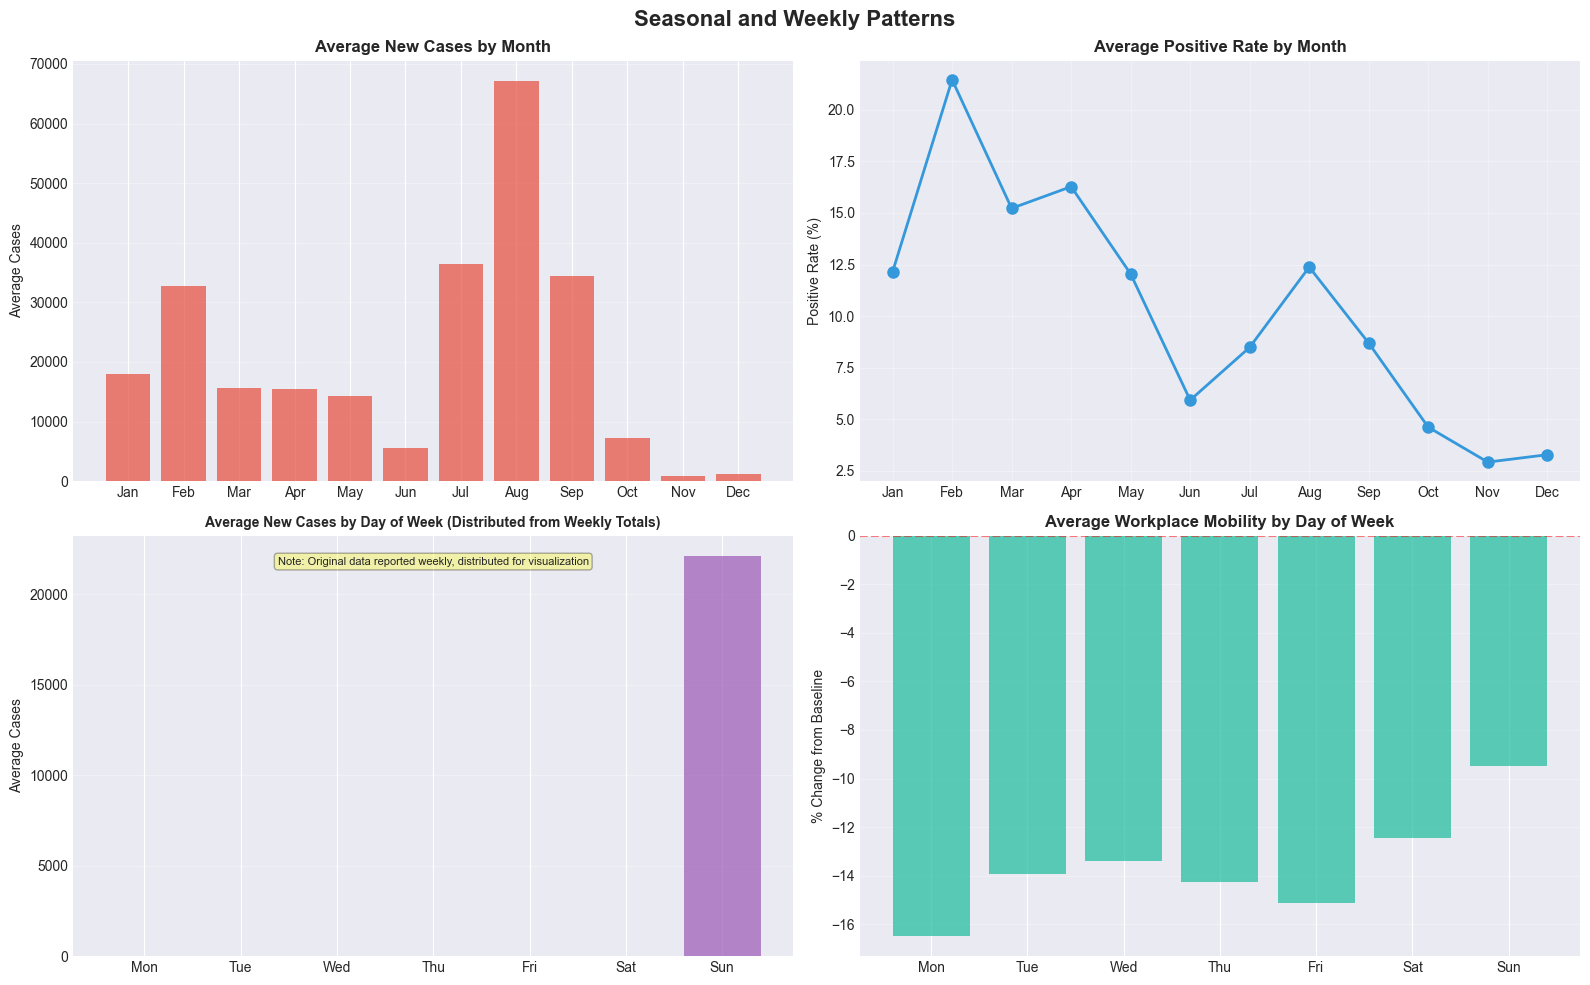

In [40]:
# Figure 13: Seasonal Patterns
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Seasonal and Weekly Patterns', fontsize=16, fontweight='bold')

# Monthly pattern
monthly_avg = df.groupby('month').agg({
    'new_cases': 'mean',
    'positive_rate': 'mean',
    'workplaces_percent_change_from_baseline': 'mean'
})

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

axes[0, 0].bar(monthly_avg.index, monthly_avg['new_cases'], color='#e74c3c', alpha=0.7)
axes[0, 0].set_xticks(range(1, 13))
axes[0, 0].set_xticklabels(month_names)
axes[0, 0].set_title('Average New Cases by Month', fontweight='bold')
axes[0, 0].set_ylabel('Average Cases')
axes[0, 0].grid(True, alpha=0.3, axis='y')

axes[0, 1].plot(monthly_avg.index, monthly_avg['positive_rate']*100, 
                marker='o', linewidth=2, color='#3498db', markersize=8)
axes[0, 1].set_xticks(range(1, 13))
axes[0, 1].set_xticklabels(month_names)
axes[0, 1].set_title('Average Positive Rate by Month', fontweight='bold')
axes[0, 1].set_ylabel('Positive Rate (%)')
axes[0, 1].grid(True, alpha=0.3)

# Day of week pattern - USE DISTRIBUTED DATA if weekly reported
dow_avg_dist = df_distributed.groupby('day_of_week').agg({
    'new_cases_daily': 'mean',
    'workplaces_percent_change_from_baseline': 'mean'
})

dow_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Add annotation if data is weekly reported
title_suffix = ' (Distributed from Weekly Totals)' if weekly_reported else ''

axes[1, 0].bar(dow_avg_dist.index, dow_avg_dist['new_cases_daily'], color='#9b59b6', alpha=0.7)
axes[1, 0].set_xticks(range(7))
axes[1, 0].set_xticklabels(dow_names)
axes[1, 0].set_title(f'Average New Cases by Day of Week{title_suffix}', fontweight='bold', fontsize=10)
axes[1, 0].set_ylabel('Average Cases')
axes[1, 0].grid(True, alpha=0.3, axis='y')

if weekly_reported:
    axes[1, 0].text(0.5, 0.95, 'Note: Original data reported weekly, distributed for visualization',
                    transform=axes[1, 0].transAxes, ha='center', va='top',
                    bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3), fontsize=8)

axes[1, 1].bar(dow_avg_dist.index, dow_avg_dist['workplaces_percent_change_from_baseline'], 
               color='#1abc9c', alpha=0.7)
axes[1, 1].set_xticks(range(7))
axes[1, 1].set_xticklabels(dow_names)
axes[1, 1].set_title('Average Workplace Mobility by Day of Week', fontweight='bold')
axes[1, 1].set_ylabel('% Change from Baseline')
axes[1, 1].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

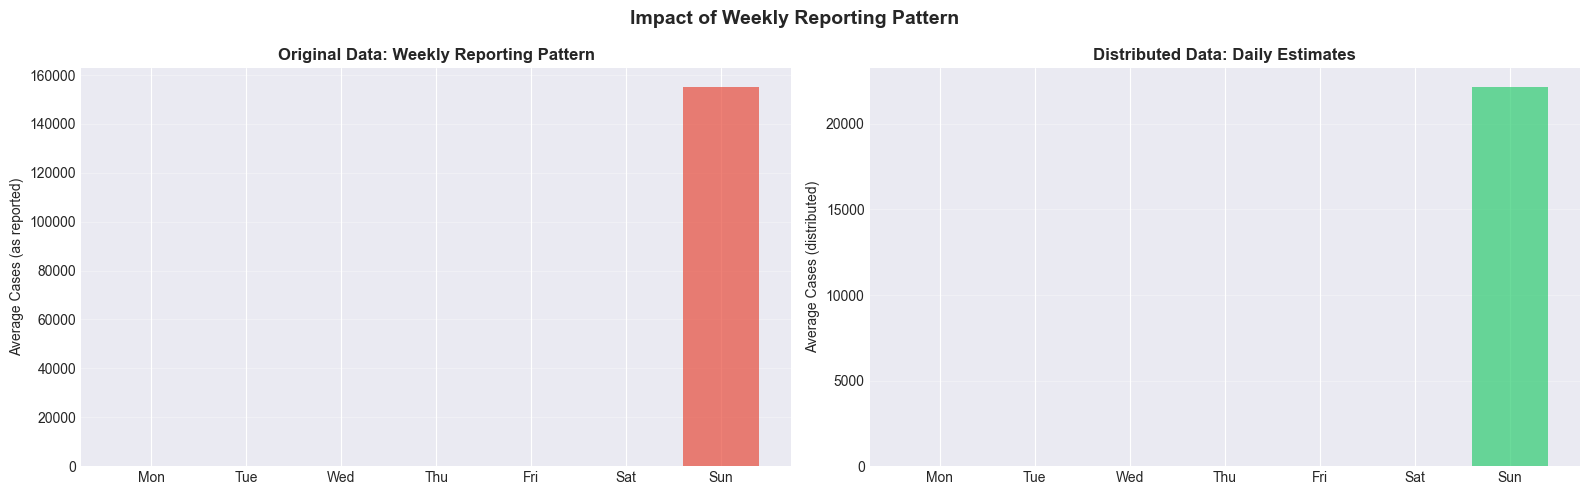

In [41]:
# Additional visualization: Raw vs Distributed (if weekly reported)
if weekly_reported:
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    fig.suptitle('Impact of Weekly Reporting Pattern', fontsize=14, fontweight='bold')
    
    # Original reporting pattern
    dow_avg_raw = df.groupby('day_of_week')['new_cases'].mean()
    axes[0].bar(dow_avg_raw.index, dow_avg_raw.values, color='#e74c3c', alpha=0.7)
    axes[0].set_xticks(range(7))
    axes[0].set_xticklabels(dow_names)
    axes[0].set_title('Original Data: Weekly Reporting Pattern', fontweight='bold')
    axes[0].set_ylabel('Average Cases (as reported)')
    axes[0].grid(True, alpha=0.3, axis='y')
    
    # Distributed pattern
    axes[1].bar(dow_avg_dist.index, dow_avg_dist['new_cases_daily'].values, color='#2ecc71', alpha=0.7)
    axes[1].set_xticks(range(7))
    axes[1].set_xticklabels(dow_names)
    axes[1].set_title('Distributed Data: Daily Estimates', fontweight='bold')
    axes[1].set_ylabel('Average Cases (distributed)')
    axes[1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()

# 18. MULTIVARIATE TIME SERIES

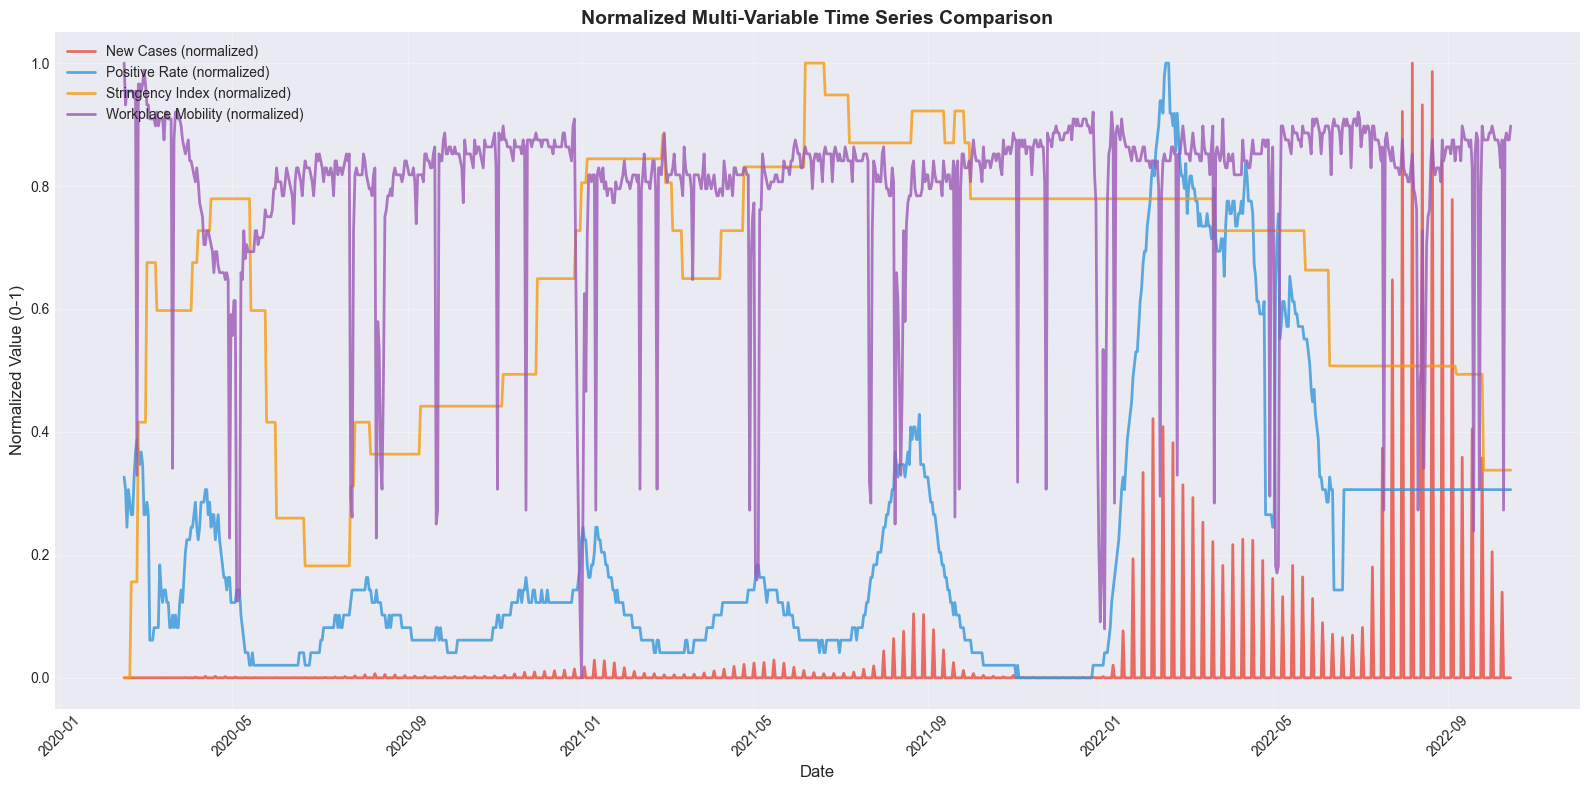

In [42]:
# Figure 14: Combined Multi-line Time Series
fig, ax = plt.subplots(figsize=(16, 8))

# Normalize data for comparison
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_plot = df.copy()
df_plot['new_cases_norm'] = scaler.fit_transform(df_plot[['new_cases']])
df_plot['positive_rate_norm'] = scaler.fit_transform(df_plot[['positive_rate']])
df_plot['stringency_norm'] = scaler.fit_transform(df_plot[['stringency_index']])
df_plot['workplace_norm'] = scaler.fit_transform(df_plot[['workplaces_percent_change_from_baseline']])

ax.plot(df_plot['date'], df_plot['new_cases_norm'], 
        label='New Cases (normalized)', linewidth=2, color='#e74c3c', alpha=0.8)
ax.plot(df_plot['date'], df_plot['positive_rate_norm'], 
        label='Positive Rate (normalized)', linewidth=2, color='#3498db', alpha=0.8)
ax.plot(df_plot['date'], df_plot['stringency_norm'], 
        label='Stringency Index (normalized)', linewidth=2, color='#f39c12', alpha=0.8)
ax.plot(df_plot['date'], df_plot['workplace_norm'], 
        label='Workplace Mobility (normalized)', linewidth=2, color='#9b59b6', alpha=0.8)

ax.set_title('Normalized Multi-Variable Time Series Comparison', fontsize=14, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Normalized Value (0-1)', fontsize=12)
ax.legend(loc='upper left', fontsize=10)
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 19. ANOMALY DETECTION

In [43]:
# Detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect outliers in new_cases
outliers_cases, lb_cases, ub_cases = detect_outliers_iqr(df[df['new_cases'] > 0], 'new_cases')
print(f"\nNew Cases Outliers Detected: {len(outliers_cases)}")
print(f"Lower Bound: {lb_cases:.0f}, Upper Bound: {ub_cases:.0f}")
if len(outliers_cases) > 0:
    print("\nTop 5 Anomalous Days (Highest Cases):")
    print(outliers_cases.nlargest(5, 'new_cases')[['date', 'new_cases', 'stringency_index']])

# Detect outliers in positive_rate
outliers_pos, lb_pos, ub_pos = detect_outliers_iqr(df[df['positive_rate'] > 0], 'positive_rate')
print(f"\nPositive Rate Outliers Detected: {len(outliers_pos)}")
print(f"Lower Bound: {lb_pos:.3f}, Upper Bound: {ub_pos:.3f}")


New Cases Outliers Detected: 18
Lower Bound: -207153, Upper Bound: 354837

Top 5 Anomalous Days (Highest Cases):
          date  new_cases  stringency_index
904 2022-08-07  1496968.0             37.52
918 2022-08-21  1476374.0             37.52
911 2022-08-14  1395301.0             37.52
897 2022-07-31  1379099.0             37.52
925 2022-08-28  1258772.0             37.51

Positive Rate Outliers Detected: 80
Lower Bound: -0.150, Upper Bound: 0.330


# 20. DATA QUALITY REPORT

In [44]:
print("\n" + "="*80)
print("FINAL DATA QUALITY REPORT")
print("="*80)

print(f"\nTotal Records: {len(df)}")
print(f"Date Range: {df['date'].min().strftime('%Y-%m-%d')} to {df['date'].max().strftime('%Y-%m-%d')}")
print(f"Duration: {(df['date'].max() - df['date'].min()).days} days")

# Check for zeros and missing patterns
print("\nZero Values Count:")
zero_counts = (df == 0).sum()
print(zero_counts[zero_counts > 0])

print("\nData Completeness:")
completeness = (1 - df.isnull().sum() / len(df)) * 100
print(completeness)

# Feature statistics
print("\nFeature Value Ranges:")
print(f"New Cases: {df['new_cases'].min():.0f} to {df['new_cases'].max():.0f}")
print(f"Positive Rate: {df['positive_rate'].min():.3f} to {df['positive_rate'].max():.3f}")
print(f"Stringency Index: {df['stringency_index'].min():.2f} to {df['stringency_index'].max():.2f}")
print(f"Workplace Mobility: {df['workplaces_percent_change_from_baseline'].min():.0f}% to {df['workplaces_percent_change_from_baseline'].max():.0f}%")

# ================================
# 21. RECOMMENDATIONS FOR MODELING
# ================================

print("\n" + "="*80)
print("KEY RECOMMENDATIONS FOR MODELING")
print("="*80)

print("""
1. FEATURE ENGINEERING:
   - Create lag features (7, 14, 21 days) for mobility metrics
   - Calculate rolling averages (7-day, 14-day) for smoothing
   - Include temporal features (day_of_week, month, is_weekend)
   - Consider interaction features (stringency * mobility)

2. TARGET VARIABLE:
   - Use positive_rate as primary target (more reliable than raw cases)
   - Consider log-transformation for new_cases due to skewness
   - Use 7-day rolling average to reduce daily volatility

3. IMPORTANT FEATURES IDENTIFIED:
   - Lagged mobility metrics (especially workplaces, retail)
   - Stringency index (strong policy indicator)
   - Historical positive_rate (7-14 day lags)
   - Temporal features (seasonality detected)

4. DATA PREPROCESSING:
   - Handle zero cases days appropriately
   - Normalize/standardize mobility features
   - Consider separate models for different pandemic phases

5. MODEL CONSIDERATIONS:
   - LSTM/GRU: Good for capturing temporal dependencies
   - TCN: Can handle long sequences efficiently
   - Transformer: May capture global patterns well
   - Random Forest: Strong baseline with lag features

6. VALIDATION STRATEGY:
   - Use time-based split (not random split)
   - Consider walk-forward validation
   - Test on different pandemic waves separately

7. EVALUATION METRICS:
   - RMSE/MAE for continuous predictions
   - MAPE for percentage error
   - Direction accuracy (up/down trends)
""")

print("\n" + "="*80)
print("EDA COMPLETED SUCCESSFULLY!")
print("="*80)
print("\nAll visualizations generated. Dataset is ready for feature engineering and modeling.")


FINAL DATA QUALITY REPORT

Total Records: 974
Date Range: 2020-02-15 to 2022-10-15
Duration: 973 days

Zero Values Count:
new_cases                                             835
new_deaths                                            837
hosp_patients                                          73
positive_rate                                          53
retail_and_recreation_percent_change_from_baseline     12
grocery_and_pharmacy_percent_change_from_baseline      83
parks_percent_change_from_baseline                     21
workplaces_percent_change_from_baseline                 7
residential_percent_change_from_baseline                5
day_of_week                                           139
new_cases_7day_avg                                      1
new_cases_14day_avg                                     1
positive_rate_7day_avg                                 46
dtype: Int64

Data Completeness:
date                                                  100.0
new_cases                     